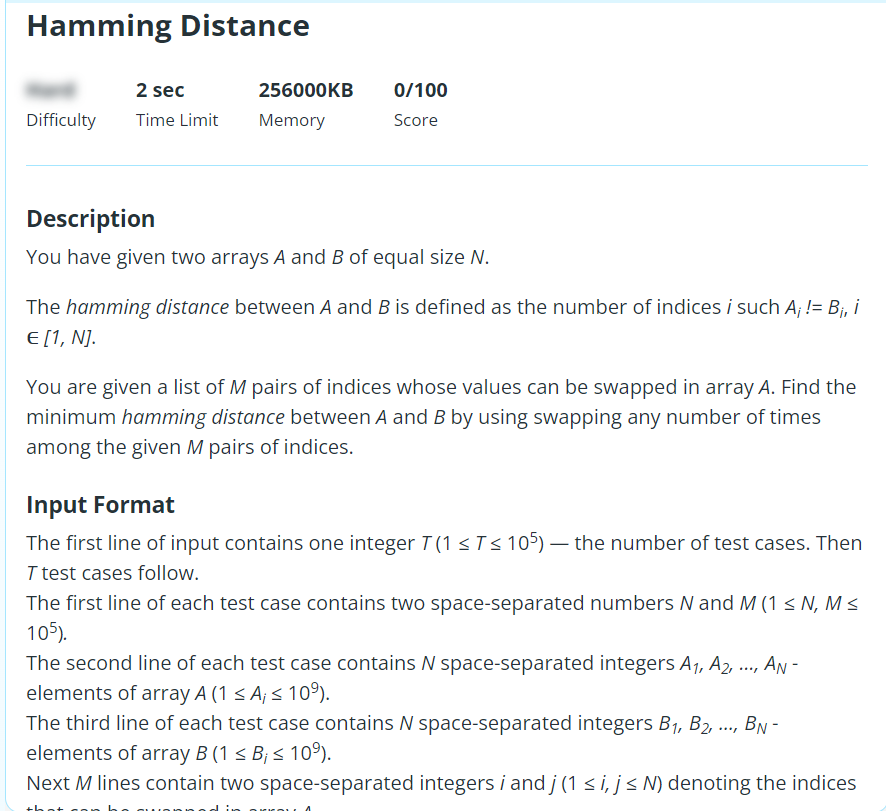

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


void dfs(int cur,int idx,vector<vector<int>>&graph,vector<vector<int>>&groups,vector<bool>&visited){
	if(visited[cur])return;

	visited[cur]=true;
	groups[idx].push_back(cur);
	for(auto it:graph[cur]){
		dfs(it,idx,graph,groups,visited);
	}
}



void solve(){

	int n,m;
	cin>>n>>m;

	vector<vector<int>>graph(n);
	vector<vector<int>>groups(n);

	vector<bool>visited(n);

	vector<int>A(n),B(n);

	for(int i=0;i<n;i++)cin>>A[i];
    for(int i=0;i<n;i++)cin>>B[i];


	for(int i=0;i<m;i++){
		int u,v;
		cin>>u>>v;
		u--;
		v--;
		graph[u].push_back(v);
		graph[v].push_back(u);
	}

	int cnt=0;
	for(int i=0;i<n;i++){
		if(!visited[i]){
			dfs(i,cnt,graph,groups,visited);
			cnt++;
		}
	}

	int ans=0;
	for(int i=0;i<cnt;i++){
		multiset<int>mst;
		for(auto &it:groups[i]){
			mst.insert(A[it]);
		}
		for(auto &it:groups[i]){
			// minimise hamming distance
			// more number of values that match
			if(mst.find(B[it])!=mst.end()){
				mst.erase(mst.find(B[it]));
			}
		}

		ans+=mst.size();


	}
	cout<<ans<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

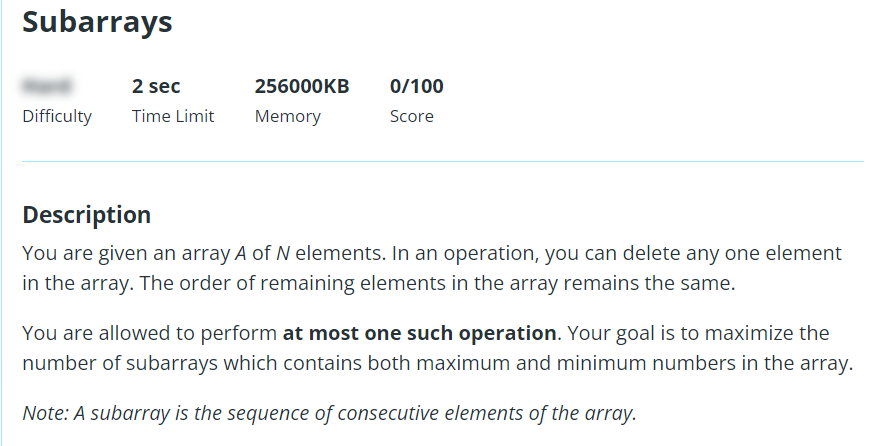

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


int f(vector<int>arr){
	int n=arr.size();
	int low=arr.back();
	int high=arr.back();

	int p1=n,p2=n;
	int ans=0;



	for(int i=n-1;i>=0;i--){
		int x=arr[i];



		if(x<low){
			low=x;
			ans=0;
		}else if(x>high){
			high=x;
			ans=0;
		}




		if(x==low){
			p1=i;
		}
		if(x==high){
			p2=i;
		}

		ans+=n-max(p1,p2);
	}

	return ans;
}


int after1(vector<int>&arr){
	int n=arr.size();
	if(n<=1){
		return n;
	}
	int pos_low=min_element(arr.begin(),arr.end())-arr.begin();
	int pos_high=max_element(arr.begin(),arr.end())-arr.begin();



	vector<int>x=arr;
	vector<int>y=arr;

	x.erase(x.begin()+pos_low);
	y.erase(y.begin()+pos_high);
	int ans=f(arr);
	ans=max({ans,f(x),f(y)});
	return ans;
}


void solve(){

	int n;
	cin>>n;
	vector<int>arr;
	for(int i=0;i<n;i++){
		int x;
		cin>>x;
		arr.push_back(x);
	}
	cout<<after1(arr)<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

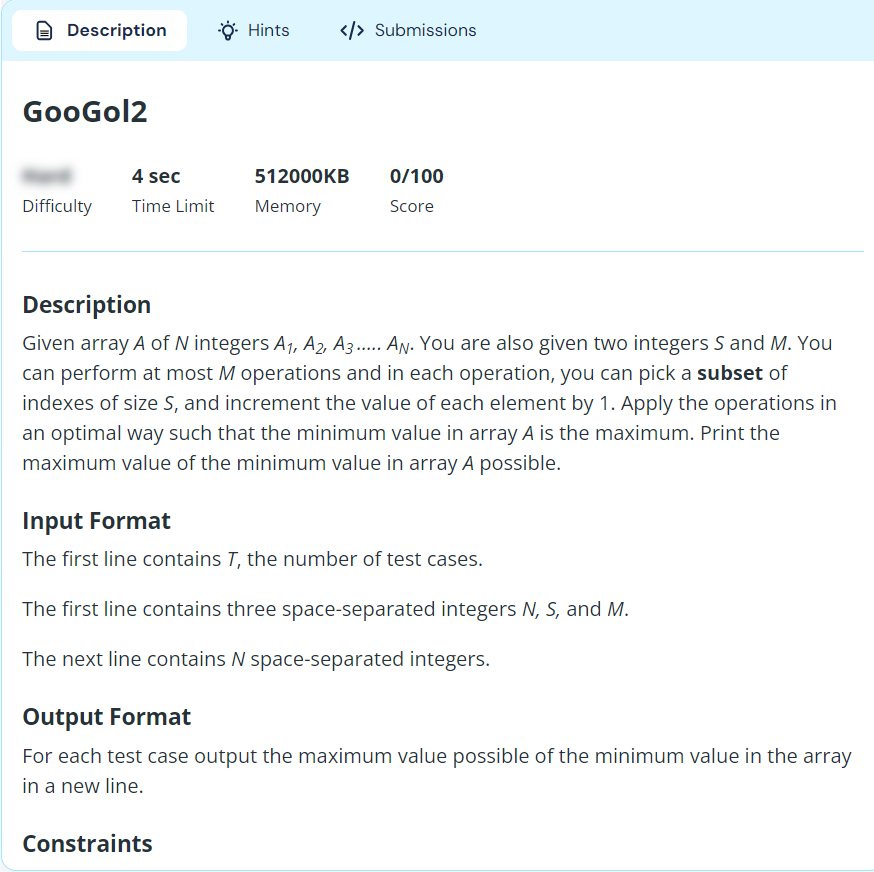

```cpp

#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




bool check(int mini,int s,int m,vector<int>&arr){
	int op=0;
	for(int i=0;i<arr.size();i++){
		op+=1ll*max(0ll,mini-arr[i]);

		if(max(0ll,mini-arr[i])>m){
			return false;
		}
	}
	return op<=m*s;
}

void solve(){

	int n,s,m;
	cin>>n>>s>>m;
	vector<int>arr(n);
	for(int i=0;i<n;i++){
		cin>>arr[i];
	}

	int l=0,r=1e18;
	int ans=0;
	while(l<=r){
		int mid=l+(r-l)/2;
		if(check(mid,s,m,arr)){
			ans=mid;
			l=mid+1;
		}else{
			r=mid-1;
		}
	}

	cout<<ans<<endl;






    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

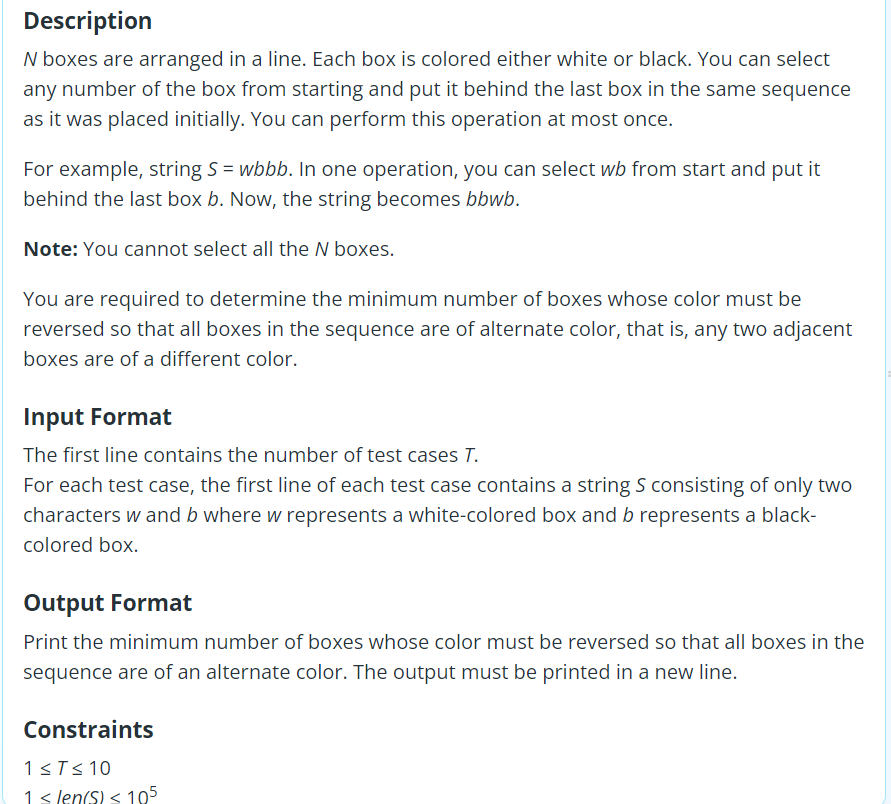

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




void solve(){


    string s;
    cin>>s;
    int n=s.size();

    vector<vector<int>>suff(n,vector<int>(2,0));
    vector<vector<int>>pref(n,vector<int>(2,0));
    for(int i=n-1;i>=0;i--){
        int x=(s[i]=='b');
        if(i==n-1){
            suff[i][x]=0;
            suff[i][1-x]=1;
        }else{
            suff[i][x]=suff[i+1][1-x];
            suff[i][1-x]=1+suff[i+1][x];

        }
    }


    for(int i=0;i<n;i++){
        int x=(s[i]=='b');
        if(!i){
            pref[i][x]=0;
            pref[i][1-x]=1;
        }else{
            pref[i][x]=pref[i-1][1-x];
            pref[i][1-x]=pref[i-1][x]+1;

        }

    }

    int ans=min(suff[0][0],suff[0][1]);

    for(int i=0;i<n-1;i++){
        ans=min(ans,suff[i+1][1]+pref[i][n%2]);
        ans=min(ans,suff[i+1][0]+pref[i][1-(n%2)]);
    }
    cout<<ans<<endl;


    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

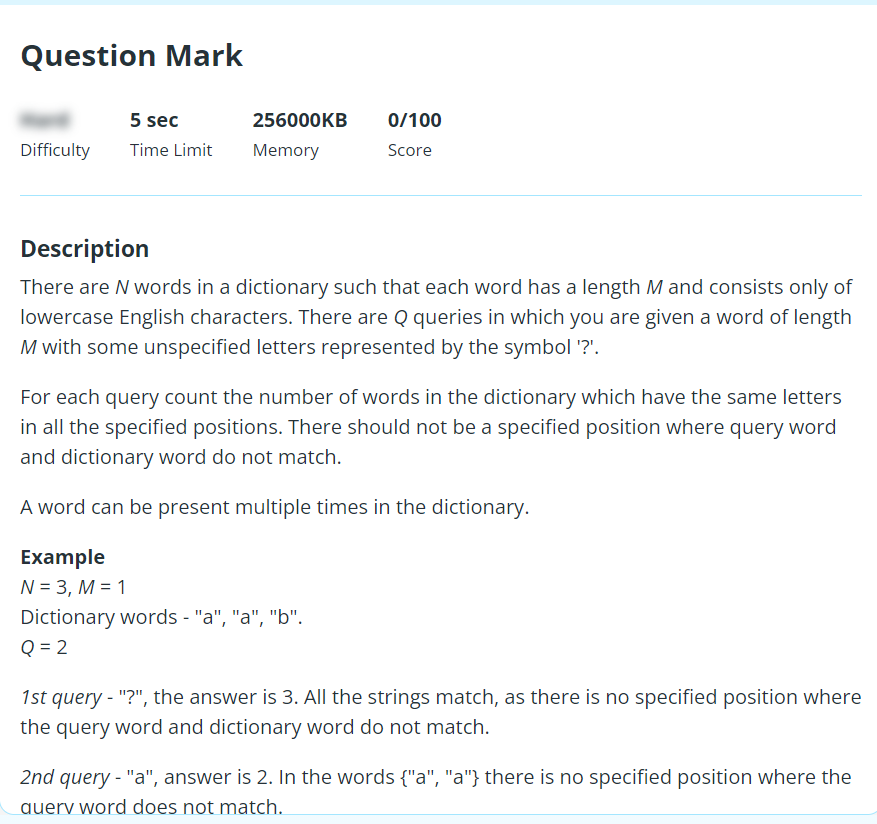

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




void solve(){


	map<string,int>mp;
	int n,m;
	string s;
	cin>>n>>m;

	for(int i=0;i<n;i++){
		cin>>s;
		for(int j=0;j<(1<<m);j++){
			string ans="";
			for(int k=0;k<m;k++){
				if(j&(1<<k)){
					ans+='?';
				}else{
					ans+=s[k];
				}
			}
			mp[ans]++;
		}
	}


	int q;
	cin>>q;
	while(q--){
		string s;
		cin>>s;
		cout<<mp[s]<<endl;
	}
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

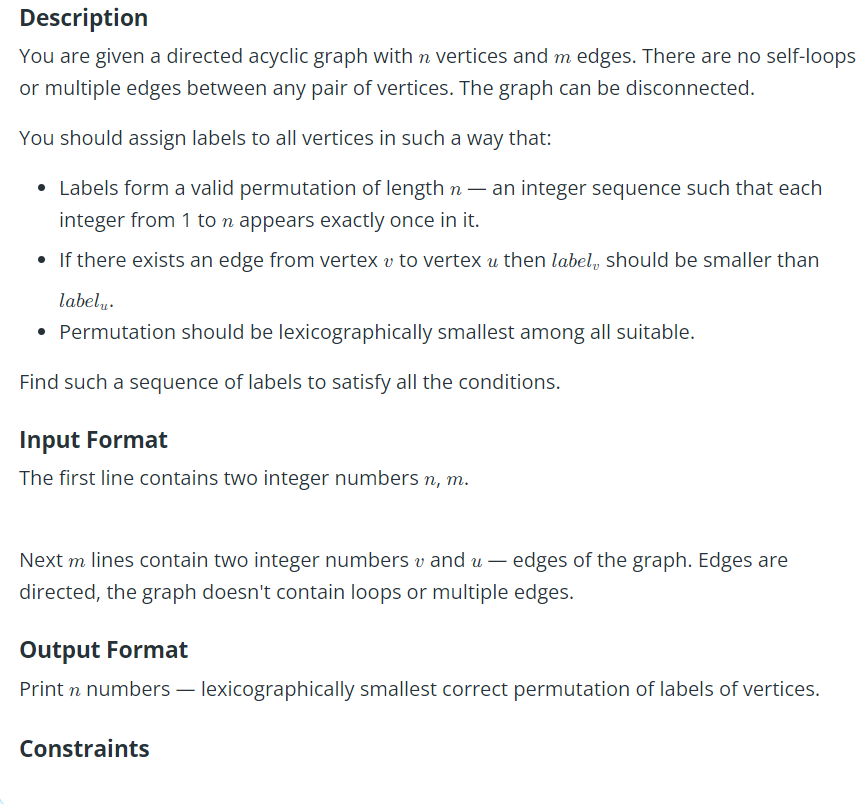

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




void solve(){

    int n,m;
    cin>>n>>m;
    vector<vector<int>>adj(n+1);
    vector<int>outdegree(n+1);
    for(int i=0;i<m;i++){
        int u,v;
        cin>>u>>v;
        adj[v].push_back(u);
        outdegree[u]++;
    }

    int t=n;
    vector<int>ans(n+1);
    priority_queue<int>pq;
    for(int i=1;i<=n;i++){
        if(outdegree[i]==0){
            pq.push(i);
        }
    }


    while(!pq.empty()){
        int node=pq.top();
        pq.pop();
        ans[node]=t;
        t--;
        for(auto it:adj[node]){
            outdegree[it]--;
            if(outdegree[it]==0){
                pq.push(it);
            }
        }
    }

    for(int i=1;i<=n;i++){
        cout<<ans[i]<<" ";
    }
    cout<<endl;

    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

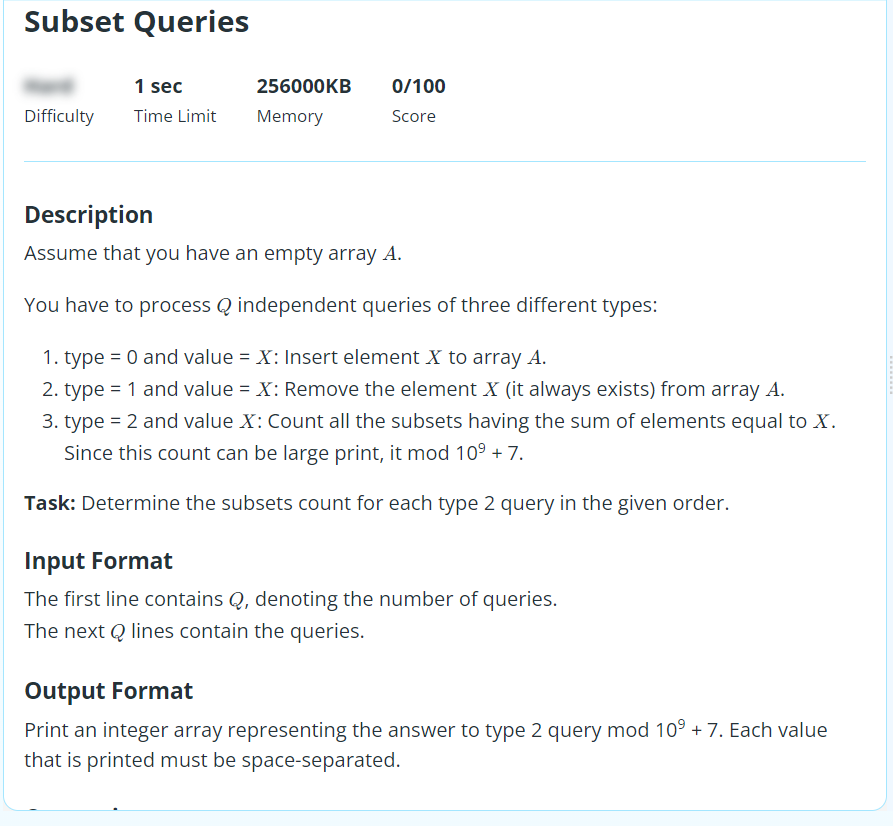
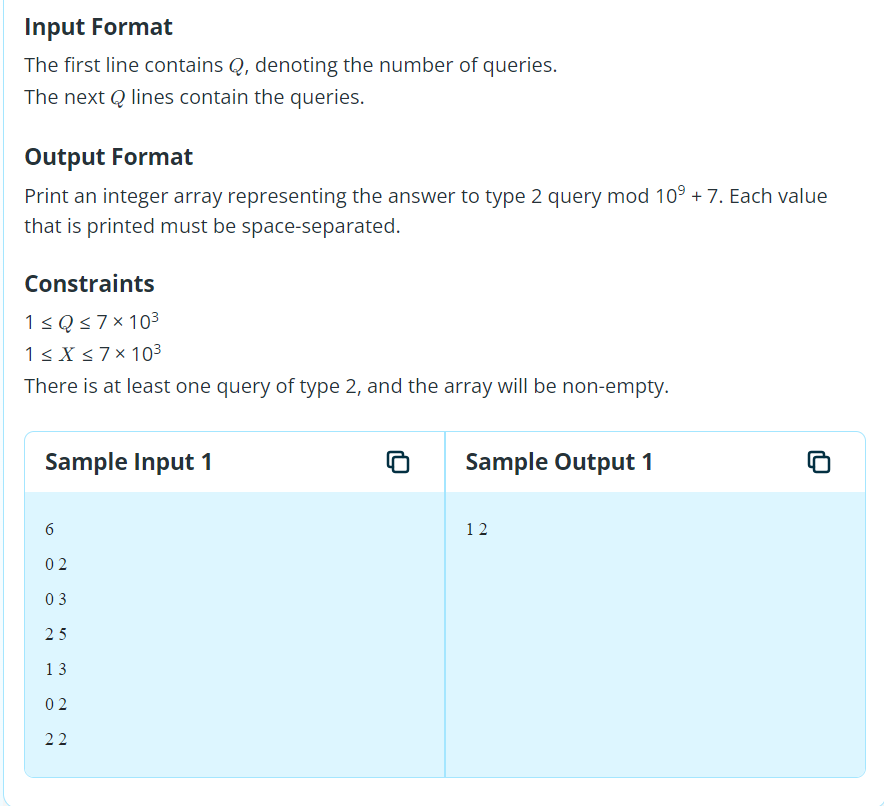

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


const int mod=1e9+7;




void solve(){

	int N=7010;
	vector<int>dp(N);
	dp[0]=1;
	

	int q;
	cin>>q;

	while(q--){
		int type,x;
		cin>>type>>x;


		if(type==0){

			for(int i=N-1;i>=0;i--){
				if(i-x>=0)
					dp[i]=(dp[i]+dp[i-x])%mod;
			}

		}else if(type==1){
			for(int i=0;i<N;i++){
				if(i-x>=0)
					dp[i]=(dp[i]-dp[i-x]+mod)%mod;
			}

		}else{
			cout<<dp[x]<<" ";
		}
	}

	cout<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

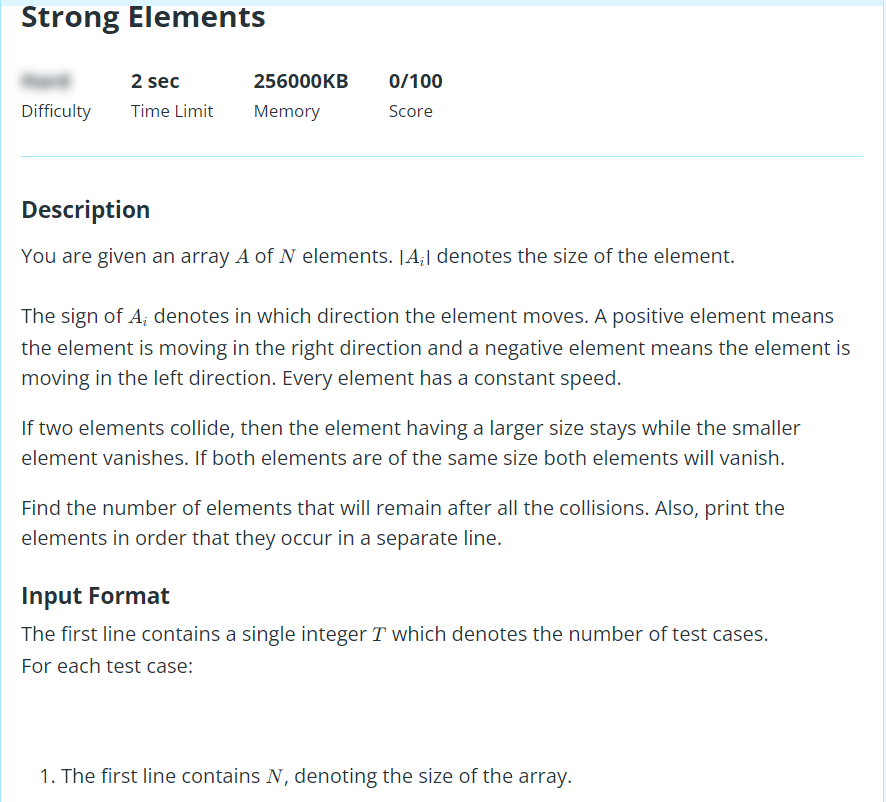
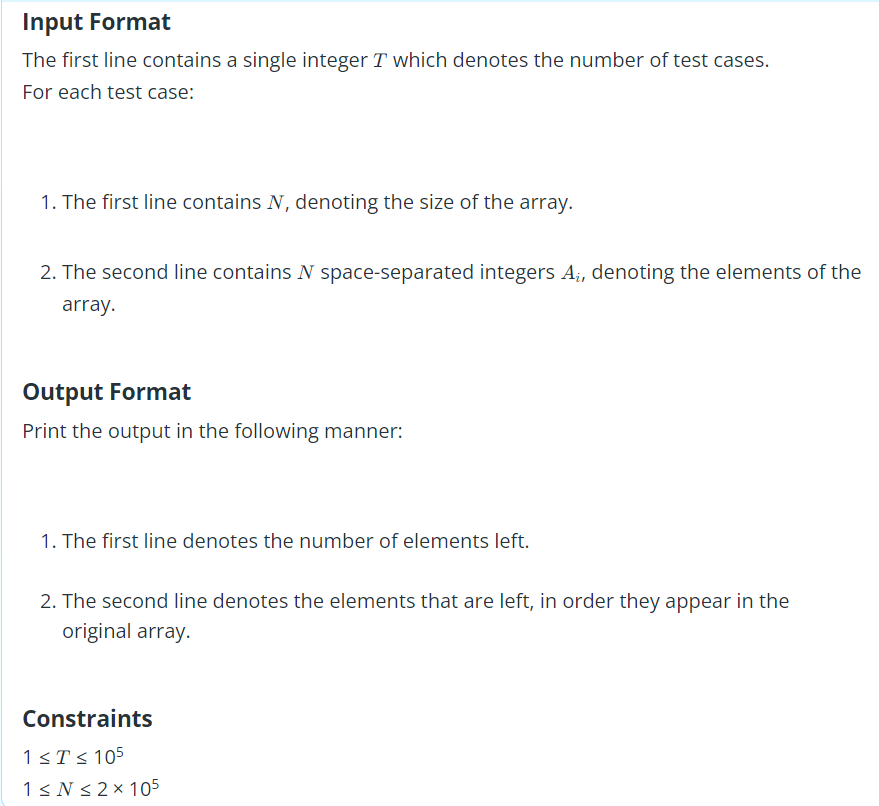

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




void solve(){

	int n;
	cin>>n;
	vector<int>arr;
	for(int i=0;i<n;i++){
		int x;
		cin>>x;
		arr.push_back(x);
	}
	stack<int>st;

	for(auto &it:arr){



		while(!st.empty() && st.top()>0 && it<0){
			int sum=it+st.top();
			if(sum<0){
				st.pop();
			}else if(sum>0){
				it=0;
				break;
			}else{
				it=0;
				st.pop();
				break;
			}
		}

		if(it!=0){
			st.push(it);
		}
	}


	vector<int>ans;
	cout<<st.size()<<endl;
	while(!st.empty()){
		ans.push_back(st.top());
		st.pop();

	}
	reverse(ans.begin(),ans.end());



	for(auto it:ans){
		cout<<it<<" ";
	}
	cout<<endl;



    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

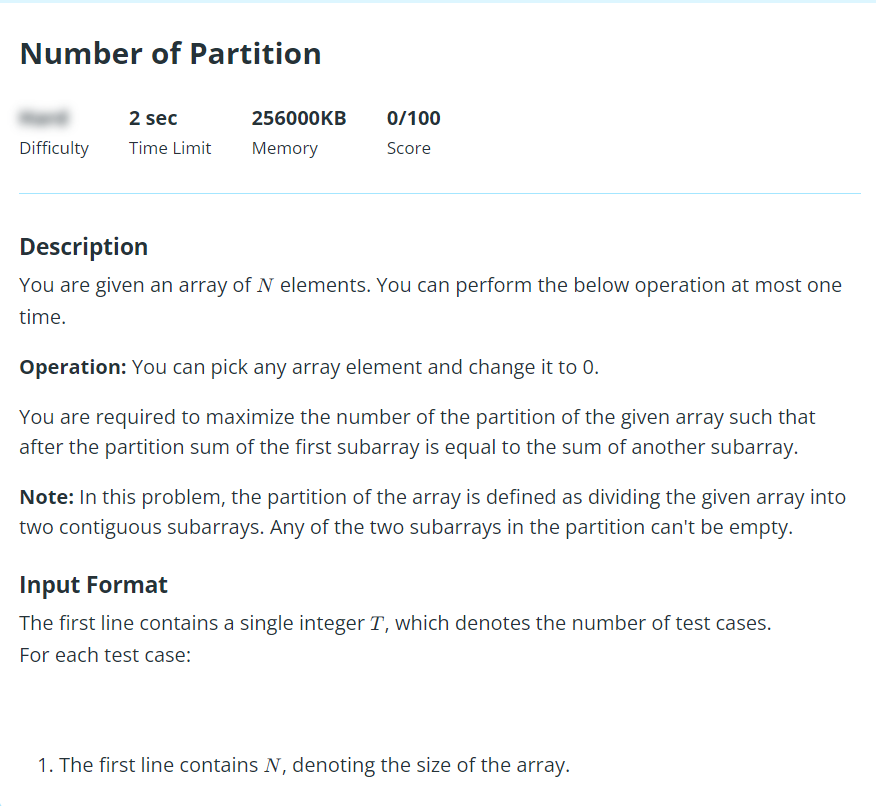
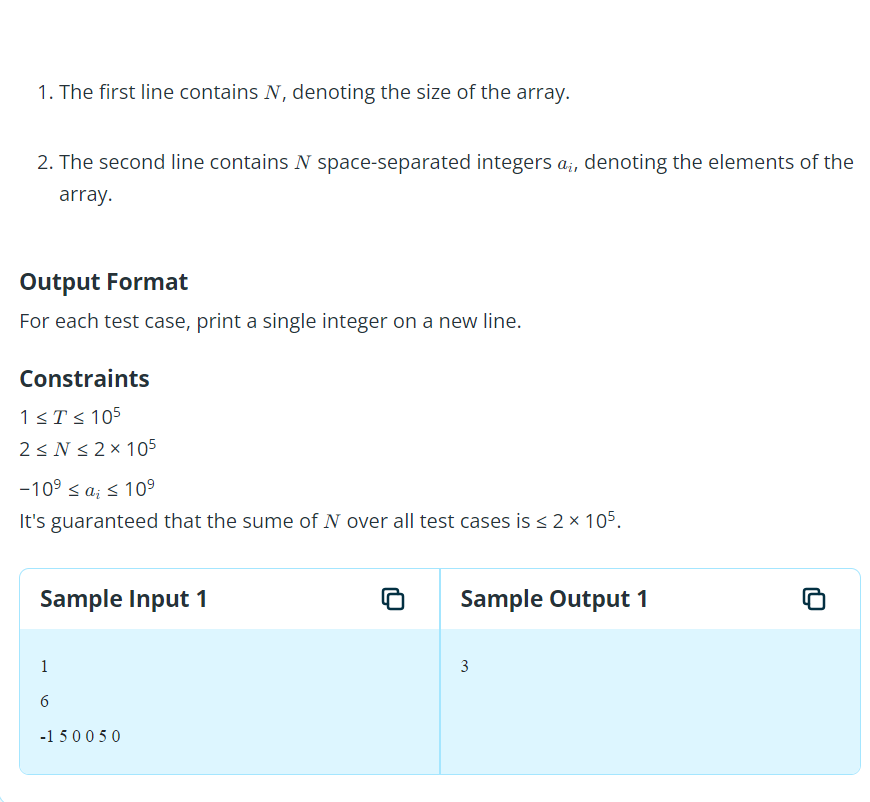

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


const int mod=1e9+7;




void solve(){

	int n;cin>>n;
	vector<int>arr(n);
	for(int i=0;i<n;i++){
		cin>>arr[i];
	}
	int k=0;
	long long sum=accumulate(arr.begin(),arr.end(),0);

	unordered_map<int,int>L,R;
	int left=0,right=0;
	for(int i=0;i<n-1;i++){
		left+=arr[i];
		right=sum-left;
		R[left-right]++;
	}
    int ans=R[0];


   	left=0,right=0;
   	for(int i=0;i<n;i++){
   		left+=arr[i];
   		right=sum-left;
   		int d=k-arr[i];
   		ans=max(ans,L[d]+R[-d]);
   		R[left-right]--;
   		L[left-right]++;
   	}
   	cout<<ans<<endl;

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

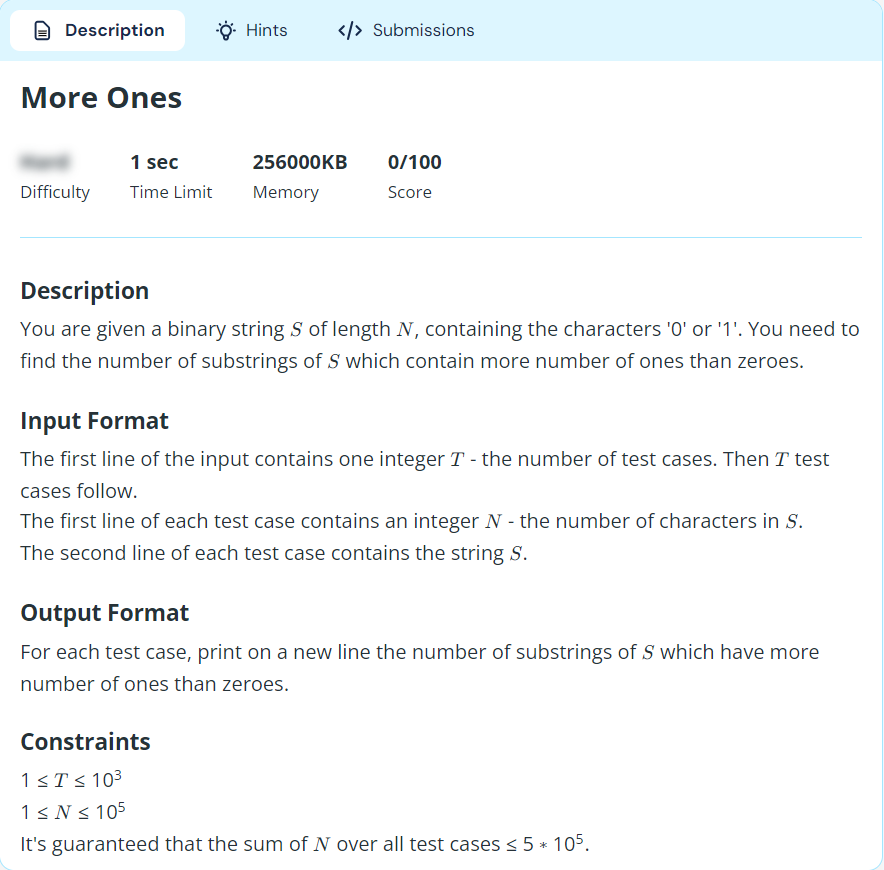

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long

void merge(vector<int>&arr,int left,int mid,int right,int &inversions){
    vector<int>temp(right-left+1);
    int i=left;
    int j=mid+1;
    int k=0;
    int cnt=0;


    while(i<=mid && j<=right){
        if(arr[i]<=arr[j]){
            temp[k++]=arr[i++];
        }else{
            inversions+=(mid-i+1);
            temp[k++]=arr[j++];
        }
    }

    while(i<=mid)temp[k++]=arr[i++];
    while(j<=right)temp[k++]=arr[j++];

    k=0;
    for(int a=left;a<=right;a++){
        arr[a]=temp[k++];
    }
}


void mergesort(vector<int>&arr,int left,int right,int &inversions){
    if(left>=right)return;
    int mid=(left+right)/2;
    
    mergesort(arr,left,mid,inversions);
    mergesort(arr,mid+1,right,inversions);
    merge(arr,left,mid,right,inversions);
}


int f(vector<int>&arr){
    int n=arr.size();
    int ans=0;
    mergesort(arr,0,n-1,ans);
    return ans;
}
void solve(){

    int n;
    cin>>n;
    string s;
    cin>>s;
    vector<int>nums(n);

    for(int i=0;i<n;i++){
        nums[i]=s[i]-'0';
        if(nums[i]==0){
            nums[i]=-1;
        }
    }

    vector<int>pref(n);

    int sum=0;

    for(int i=0;i<n;i++){
        sum+=nums[i];
        pref[i]=sum;
    }


    int cnt=0;
    for(int i=0;i<n;i++){
        if(pref[i]>0){
            cnt++;
        }
    }


    reverse(pref.begin(),pref.end());
    int ans=cnt;
    cout<<ans+f(pref)<<endl;

    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

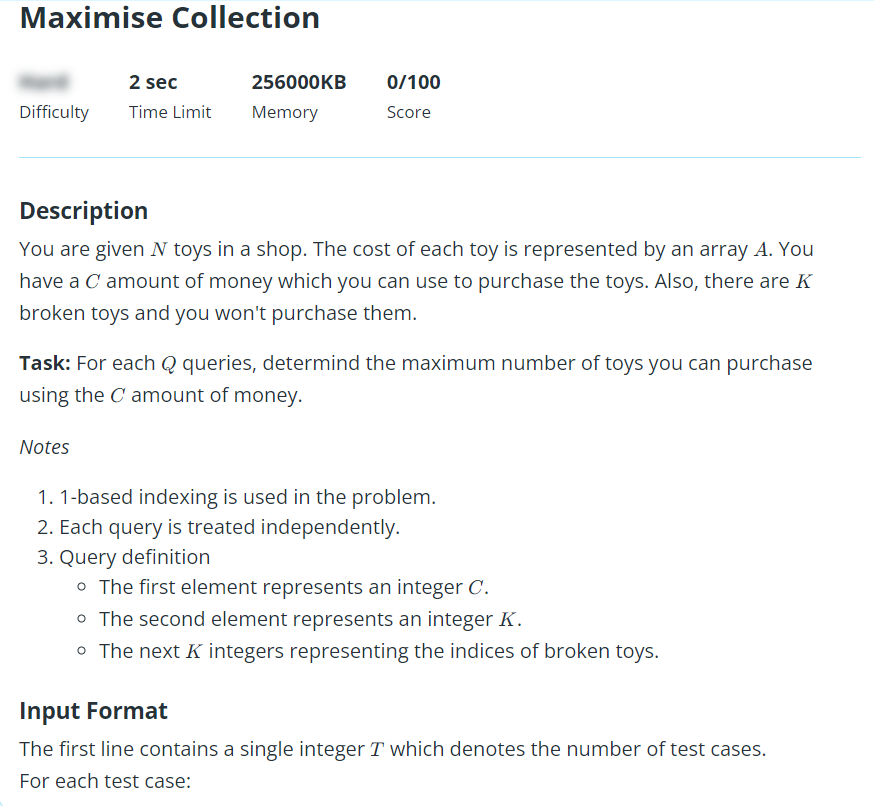
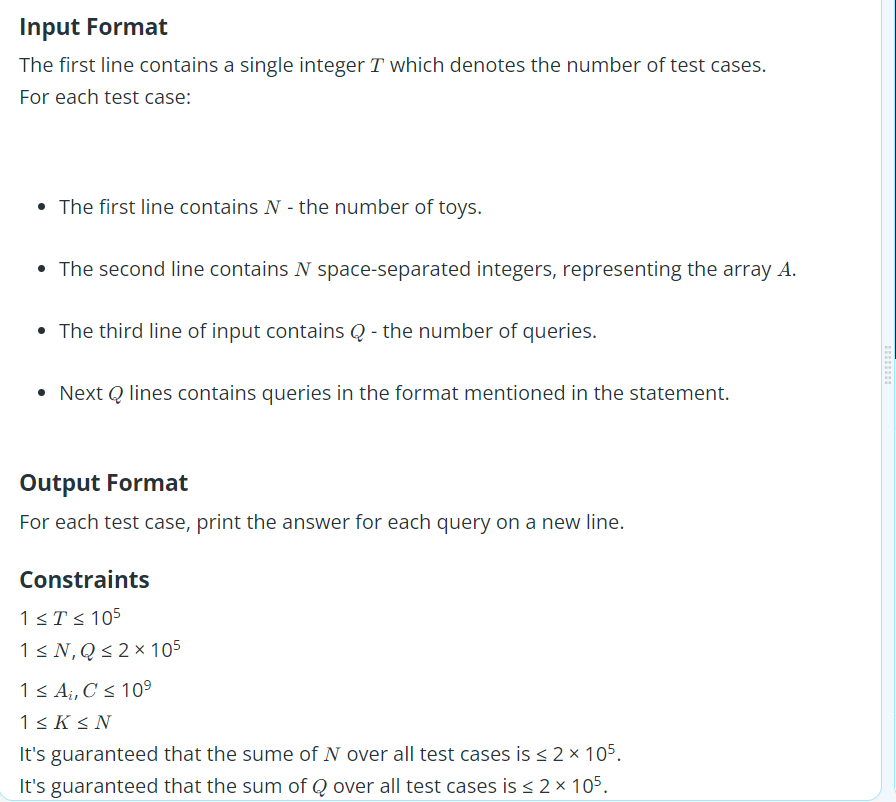
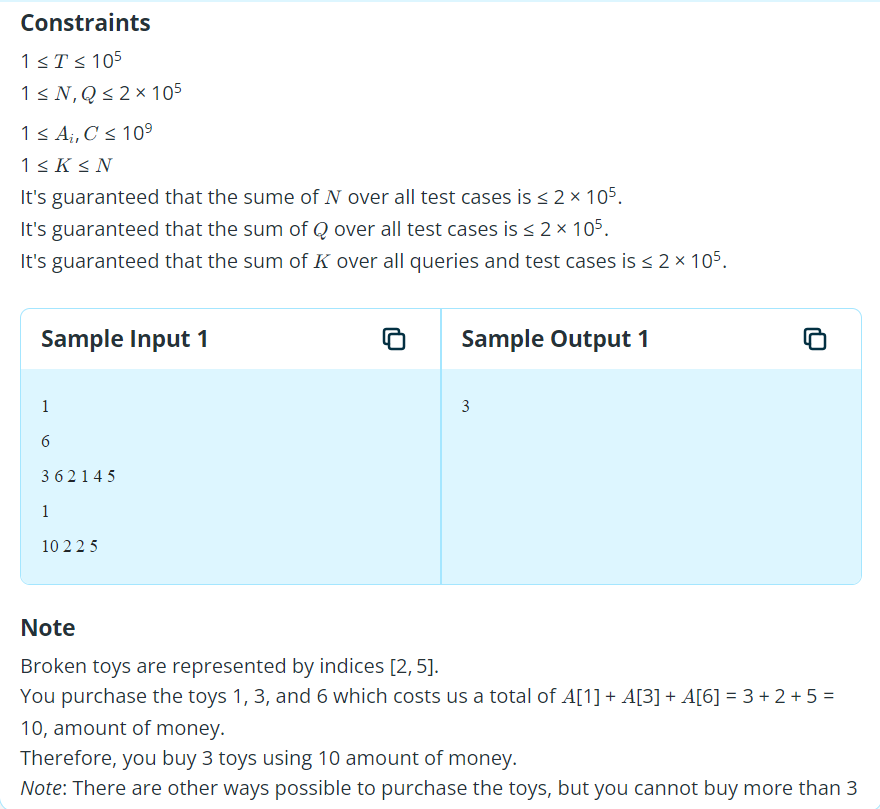

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long





vector<int>arr;
vector<int>tree;


void build(int node,int start,int end){
	if(start==end){
		tree[node]=arr[start];
		return;
	}

	int mid=(start+end)/2;
	build(2*node,start,mid);
	build(2*node+1,mid+1,end);
	tree[node]=tree[2*node]+tree[2*node+1];
}



void update(int node,int start,int end,int idx,int val){
	if(start==end){
		tree[node]=val;
		return;
	}

	int mid=(start+end)/2;

	if(idx<=mid){
		update(2*node,start,mid,idx,val);
	}else{
		update(2*node+1,mid+1,end,idx,val);
	}


	tree[node]=tree[2*node]+tree[2*node+1];
}


int query(int node, int start, int end, int l, int r) {
    if (start > r || end < l) {
        return 0; // No overlap
    }
    if (start >= l && end <= r) {
        return tree[node]; // Total overlap
    }

    int mid = (start + end) / 2;
    int left_sum = query(2*node,start,mid,l,r);
    int right_sum = query(2*node+1,mid+1,end,l,r);
    
    return left_sum + right_sum; // Partial overlap
}

void solve(){

	
     


	int n;
	cin>>n;
	arr.assign(n,1);
	tree.assign(8*n,0);
	vector<pair<int,int>>A(n);
	for(int i=0;i<n;i++){
		int val;
		cin>>val;
		A[i].first=val;
		A[i].second=i;
	}

	sort(A.begin(),A.end());


	vector<int>ridx(n);
	for(int i=0;i<n;i++){
		ridx[A[i].second]=i;
		arr[i]=A[i].first;
	}


	build(1,0,n-1);



	int q;
	cin>>q;
	while(q--){

		int c,k;
		cin>>c>>k;

		vector<int>temp;
		for(int i=0;i<k;i++){
			int x;
			cin>>x;
			x--;
			temp.push_back(x);

			update(1,0,n-1,ridx[x],0);
		}

		int l=0,r=n-1;
		int ans=-1;
		while(l<=r){
			int mid=(l+r)/2;
			int sum=query(1,0,n-1,0,mid);

			if(sum<=c){
				ans=mid;
				l=mid+1;
			}else{
				r=mid-1;
			}
		}

		ans++;// 1 based indexing

		int cnt=0;
		for(int i=0;i<k;i++){
			update(1,0,n-1,ridx[temp[i]],A[ridx[temp[i]]].first);


			if(ridx[temp[i]]<=ans){
				cnt++;
			}
		}


		ans-=cnt;
		cout<<ans<<endl;






	}


	

    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

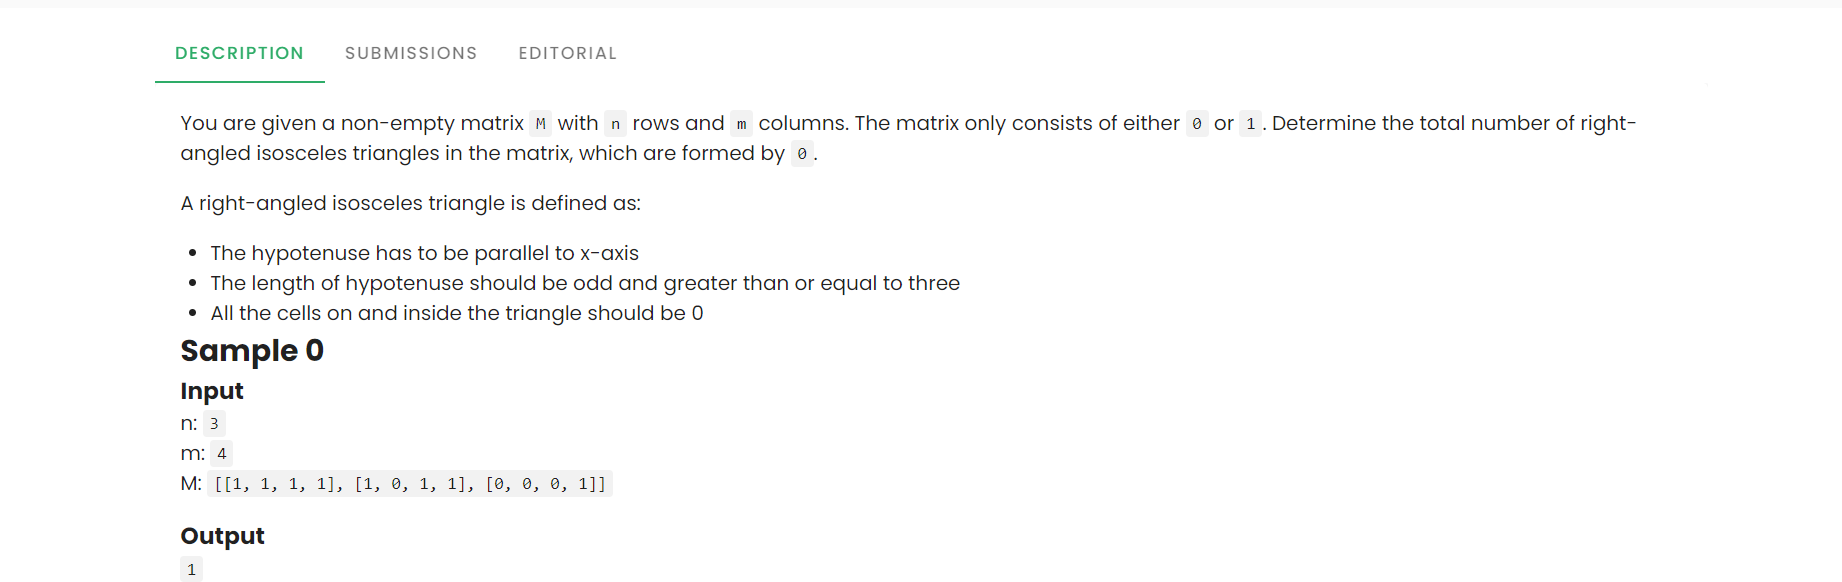

```cpp
#include <bits/stdc++.h>
using namespace std;
class IsoscelesTriangles {
public:
	// DO NOT read from stdin or write to stdout.
	// Input is given as the function arguments.
	// Output is taken as the function return value.

    // Recursive function to find the largest isosceles triangle at position (i, j)
    int getTriangleHeight(int i, int j, int n, int m, const std::vector<std::vector<int>>& M, std::vector<std::vector<int>>& memo) {
        // Base case: if out of bounds or current cell is blocked (1), return 0
        if (i >= n || j < 0 || j >= m || M[i][j] == 1) {
            return 0;
        }

        // If already computed, return the stored result
        if (memo[i][j] != -1) {
            return memo[i][j];
        }

        // Recursively calculate the heights of possible triangles
        int left = getTriangleHeight(i + 1, j - 1, n, m, M, memo);
        int mid = getTriangleHeight(i + 1, j, n, m, M, memo);
        int right = getTriangleHeight(i + 1, j + 1, n, m, M, memo);

        // Current triangle height is 1 + the minimum of the three possible paths
        memo[i][j] = 1 + std::min({left, mid, right});

        return memo[i][j];
    }

    long long getAnswer(int n, int m, const std::vector<std::vector<int>>& M) {
        vector<std::vector<int>> memo(n,vector<int>(m, -1));
        long long ans = 0;



        // Compute for all cells in the grid
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < m; j++) {
                if (M[i][j] == 0) {
                    // Calculate the height of the triangle at (i, j)
                    int height = getTriangleHeight(i, j, n, m, M, memo);
                    ans += height - 1;  // Add the number of triangles of size >= 2
                }
            }
        }

        return ans;
    }
	long getNumberOfTriangles(int n, int m, std::vector<std::vector<int>> M) {
		// Code here
        long long ans = getAnswer(n, m, M);
        reverse(M.begin(), M.end());

        ans += getAnswer(n, m, M);
        return ans;
	}
};



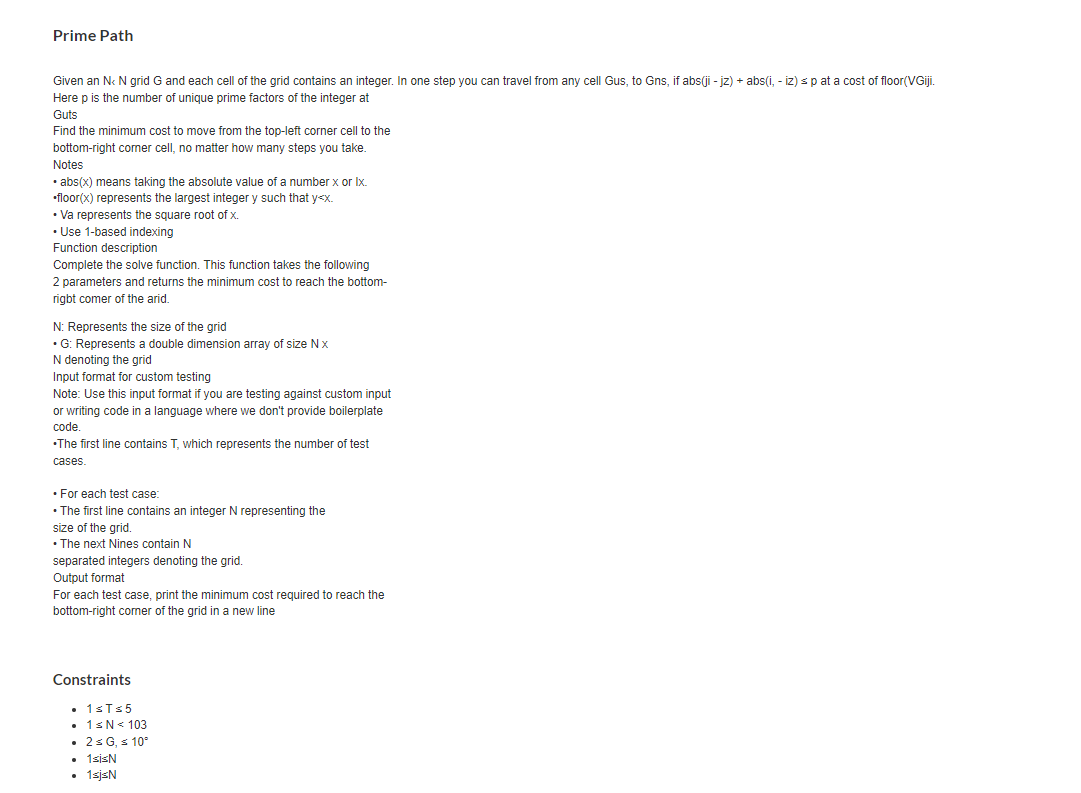

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


using state=pair<int,pair<int,int>>;

bool check=false;
vector<int>sieve(100100,1);


void f(){

	if(check==true)return;
	check=true;
	sieve[0]=sieve[1]=0;

	for(int i=2;i<100100;i++){
		if(sieve[i]==1){
			for(int j=i;j<100100;j+=i){
				if(sieve[j]==1){
					sieve[j]=i;
				}
			}
		}
	}
}


int query(int x){
	set<int>ret;
	while(x!=1){
		ret.insert(sieve[x]);
		x/=sieve[x];
	}

	return ret.size();
	
}



void solve(){

	f();

	int n;
	cin>>n;
	vector<vector<int>>grid(n,vector<int>(n,0));


	for(int i=0;i<n;i++){
		for(int j=0;j<n;j++){
			cin>>grid[i][j];
		}
	}

	vector<vector<int>>distinctPrime(n,vector<int>(n,0));
	for(int i=0;i<n;i++){
		for(int j=0;j<n;j++){
			distinctPrime[i][j]=query(grid[i][j]);
		}
	}


	priority_queue<state,vector<state>,greater<state>>pq;
	vector<vector<int>>dist(n,vector<int>(n,LONG_MAX));


	dist[0][0]=0ll;


	pq.push({0ll,{0,0}});


	while(!pq.empty()){
		auto node=pq.top();
		pq.pop();

		int x=node.second.first;
		int y=node.second.second;


		int val=distinctPrime[x][y];


		for(int i=-val+x;i<=val+x;i++){
			for(int j=-val+y;j<=val+y;j++){
				if(i<0 || j<0 || i>=n || j>=n){
					continue;
				}

				if(i==x and j==y)continue;



				if(abs(x-i)+abs(y-j)<=val){
					if(dist[i][j]>dist[x][y]+(long long)sqrt(grid[x][y])){
						dist[i][j]=dist[x][y]+(long long)sqrt(grid[x][y]);
						pq.push({dist[i][j],{i,j}});

					}	
				}
				
			}
		}
	}

	cout<<dist[n-1][n-1];









    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

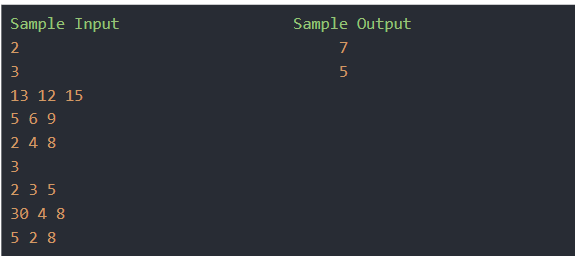

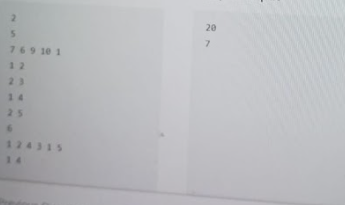

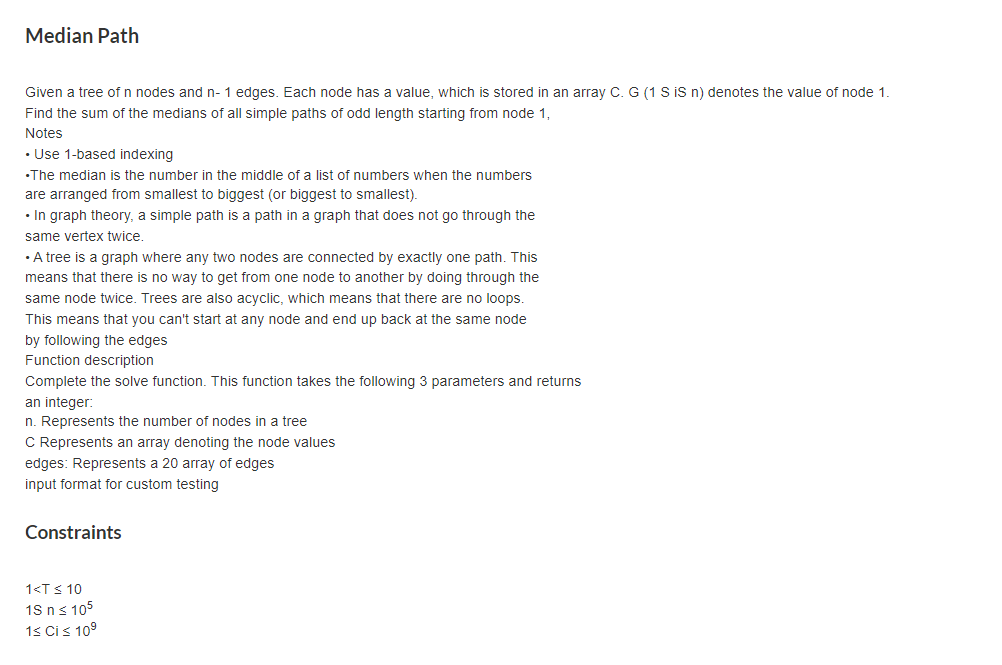

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
// #define int long long



#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

/*

os.find_by_order(os.order_of_key(num));  gives iterator     
os.order_of_key(num) position of number 
*/

ordered_set os;


void dfs(int node,int parent,vector<int>&arr,vector<vector<int>>&adj,long long &sum,long long &len){
	len++;
	os.insert(arr[node]);
	if(len%2){
		sum+=*os.find_by_order(len/2);
	}
	for(auto it:adj[node]){
		if(it!=parent){
			dfs(it,node,arr,adj,sum,len);
		}
	}
	len--;
	os.erase(os.find(arr[node]));
}

void solve(){

	os.clear();


	int n;
	cin>>n;
	vector<int>arr(n+1);
	for(int i=1;i<=n;i++){
		cin>>arr[i];
	}

	vector<vector<int>>adj(n+1);

	for(int i=0;i<n-1;i++){
		int u,v;
		cin>>u>>v;
		adj[u].push_back(v);
		adj[v].push_back(u);
	}
	long long sum=0,len=0;
	dfs(1,-1,arr,adj,sum,len);

	cout<<sum<<endl;




	

    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

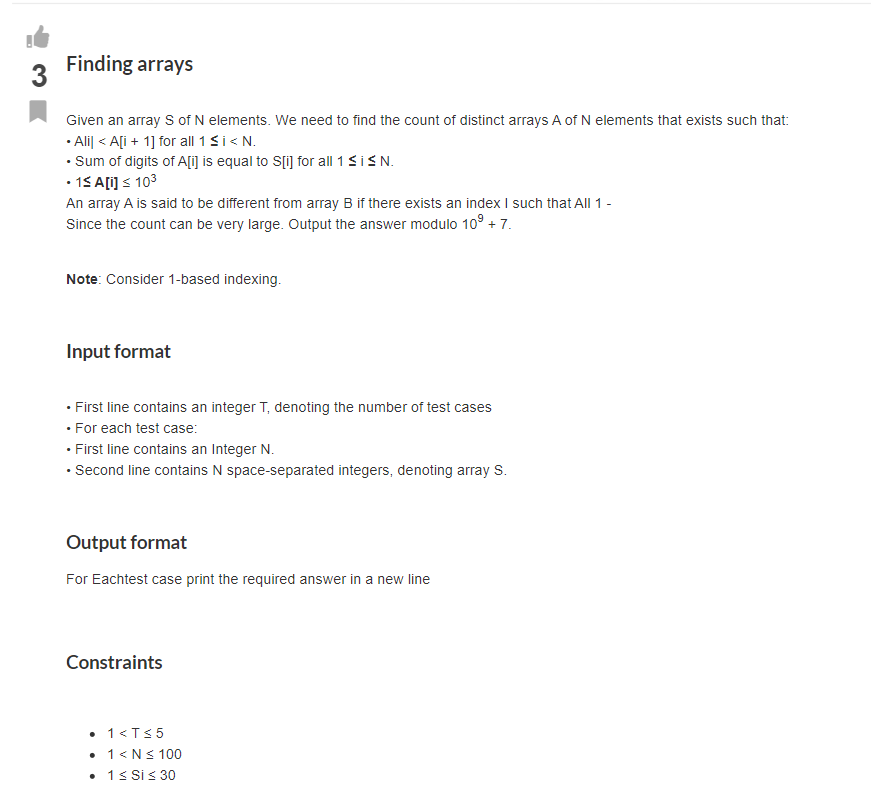

```cpp
#include <bits/stdc++.h>
using namespace std;

int mod = 1e9 + 7;
int dp[1001][101];

// Function to solve using dynamic programming
int solve(int ind, vector<int>& s, vector<int>& digit_sum, int N, int count) {
    // Base case: If we have processed all elements
    if (count == N) {
        return 1;
    }
    
    // If current number exceeds 1000, no more numbers can be picked
    if (ind > 1000) return 0;

    // If result is already computed, use memoization
    if (dp[ind][count] != -1) return dp[ind][count];

    // Option 1: Do not pick the current number
    int not_pick = solve(ind + 1, s, digit_sum, N, count) % mod;

    // Option 2: Pick the current number if it matches the digit sum constraint
    int pick = 0;
    if (digit_sum[ind] == s[count]) {
        pick = solve(ind + 1, s, digit_sum, N, count + 1) % mod;
    }

    // Store and return the result
    return dp[ind][count] = (pick + not_pick) % mod;
}

int main() {
    int n;
    cin >> n;
    vector<int> s(n);
    for (int i = 0; i < n; i++) cin >> s[i];

    // Precompute digit sums for all numbers from 1 to 1000
    vector<int> digit_sum(1001);
    digit_sum[0] = 0;
    for (int i = 1; i <= 1000; i++) {
        int number = i, sum = 0;
        while (number) {
            sum += number % 10;
            number /= 10;
        }
        digit_sum[i] = sum;
    }

    // Initialize dp table with -1
    memset(dp, -1, sizeof(dp));

    // Solve the problem
    int result = solve(1, s, digit_sum, n, 0);
    cout << result;
}


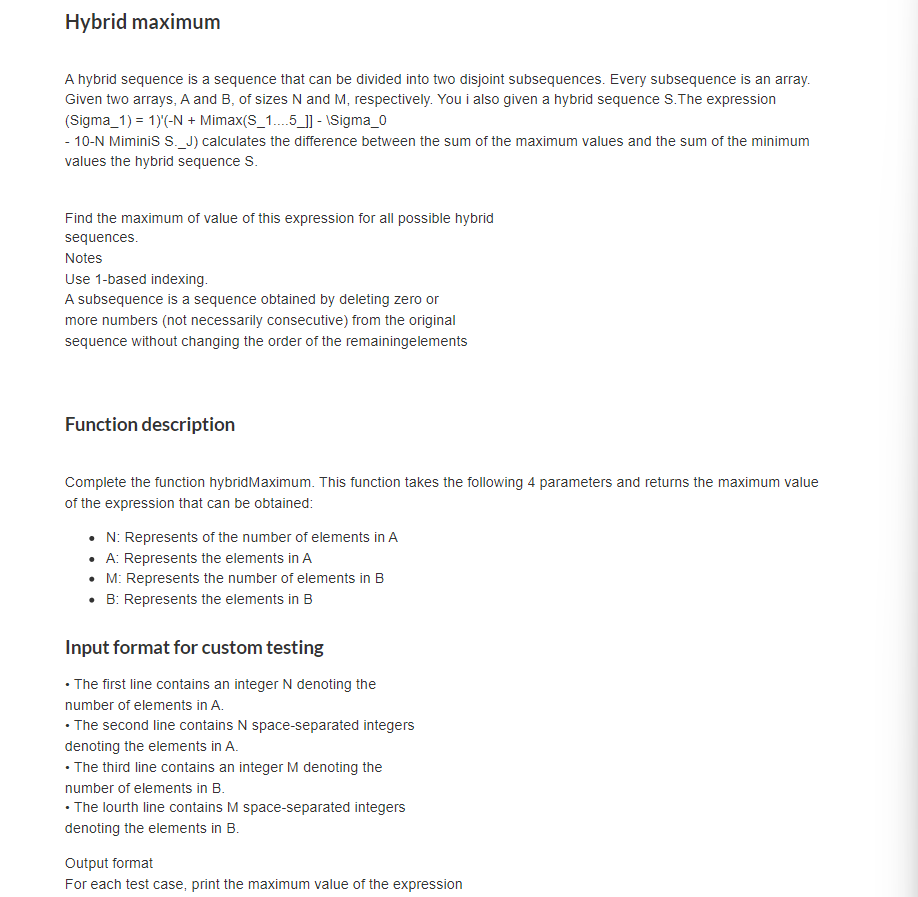

```cpp
#include <iostream>
#include <vector>
#include <climits> // For INT_MIN and INT_MAX
using namespace std;

int sol(int i, int j, int mx, int mn, vector<int> &a, vector<int> &b, vector<vector<int>> &dp) {
    if (i == a.size() && j == b.size()) {
        return 0;
    }
    
    if (dp[i][j] != -1) {
        return dp[i][j];
    }

    int res = 0;

    // Option 1: Take element from array `a`
    if (i < a.size()) {
        res = max(res, (max(mx, a[i]) - min(mn, a[i])) + sol(i + 1, j, max(mx, a[i]), min(mn, a[i]), a, b, dp));
    }

    // Option 2: Take element from array `b`
    if (j < b.size()) {
        res = max(res, (max(mx, b[j]) - min(mn, b[j])) + sol(i, j + 1, max(mx, b[j]), min(mn, b[j]), a, b, dp));
    }

    return dp[i][j] = res;
}

void solve() {
    int n;
    cin >> n;
    vector<int> a(n);
    for (int i = 0; i < n; ++i) {
        cin >> a[i];
    }

    int m;
    cin >> m;
    vector<int> b(m);
    for (int i = 0; i < m; ++i) {
        cin >> b[i];
    }

    vector<vector<int>> dp(n + 1, vector<int>(m + 1, -1));

    // Call the `sol` function starting from index 0 for both arrays
    cout << sol(0, 0, INT_MIN, INT_MAX, a, b, dp) << endl;
}

int main() {
    solve();
    return 0;
}


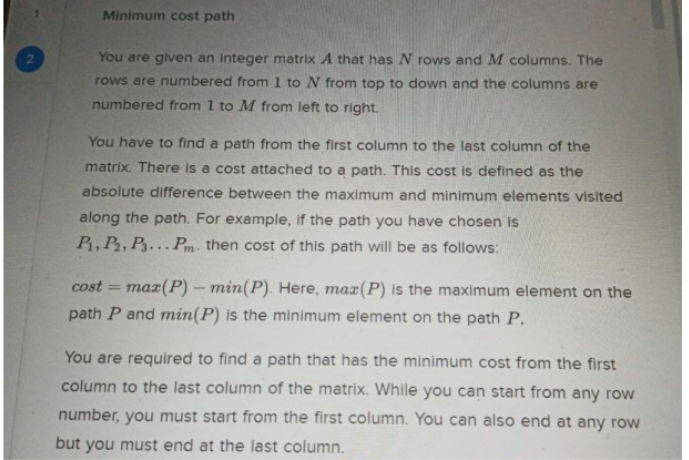

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <unordered_map>
#include <climits>
using namespace std;

class Solution {
public:
    int minCost() {
        // Hardcoded matrix
        vector<vector<int>> matrix = {
            {773463780, 891463230, 2909047, 138109337, 270993942},
            {679463184, 272117955, 656458540, 142325442, 994548157},
            {574949439, 140088971, 177467295, 164760238, 162291408},
            {664949995, 169368191, 138172319, 206845377, 722959727}
        };
        
        int n = matrix.size();
        int m = matrix[0].size();

        // Step 1: Create a vector to store the values along with their column indices
        vector<pair<int, int>> cells;
        for (int i = 0; i < n; ++i) {
            for (int j = 0; j < m; ++j) {
                cells.push_back({matrix[i][j], j});
            }
        }

        // Step 2: Sort cells by value
        sort(cells.begin(), cells.end());

        // Step 3: Use sliding window approach to find the minimum cost
        unordered_map<int, int> counter; // To count how many times each column index appears
        int colCount = 0;
        int start = 0;
        int ans = INT_MAX;

        for (int end = 0; end < cells.size(); ++end) {
            int col = cells[end].second;
            counter[col]++;
            if (counter[col] == 1) {
                colCount++; // We got a new column covered
            }

            // While all columns are covered, try to minimize the cost
            while (colCount == m) {
                int cost = abs(cells[end].first - cells[start].first);
                ans = min(ans, cost);

                // Shrink the window from the start
                col = cells[start].second;
                counter[col]--;
                if (counter[col] == 0) {
                    colCount--; // One column is no longer fully covered
                }
                start++;
            }
        }

        return ans;
    }
};

int main() {
    // Example usage
    Solution sol;
    cout << "Minimum cost: " << sol.minCost() << endl;
    return 0;
}


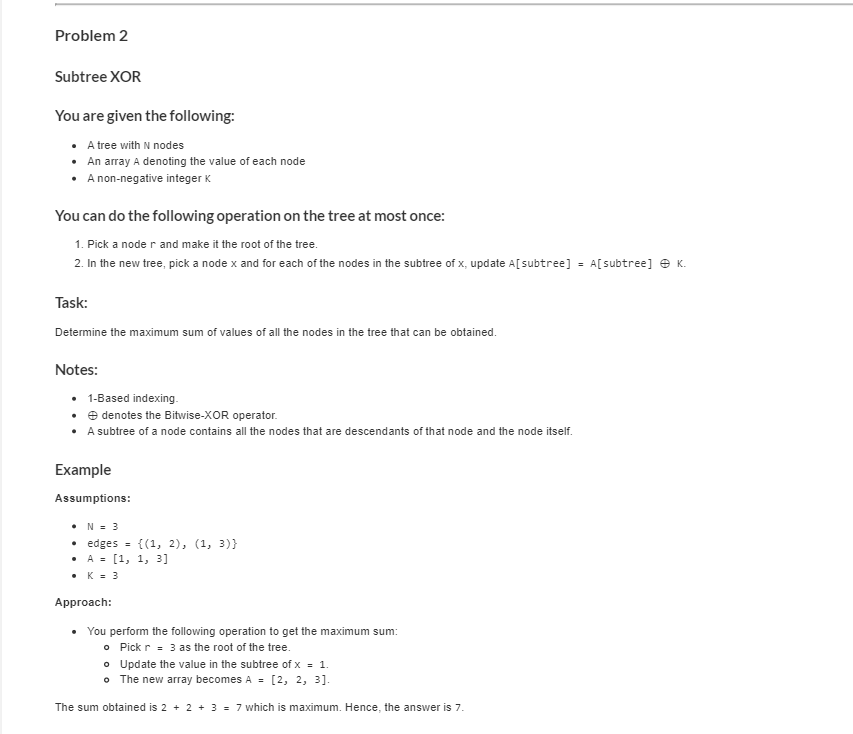

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long

// #include <ext/pb_ds/assoc_container.hpp>
// #include <ext/pb_ds/tree_policy.hpp>
// using namespace __gnu_pbds;

// typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

vector<int>in;
vector<int>subsum;
int ans=0;
int sum=0;



void dfs1(int node,int par,vector<vector<int>>&adj,int k,vector<int>arr){
	in[node]=(arr[node]^k);
	subsum[node]=arr[node];


	for(auto it:adj[node]){
		if(it==par)continue;
		dfs1(it,node,adj,k,arr);
		in[node]+=in[it];
		subsum[node]+=subsum[it];
	}


	ans=max(ans,sum-subsum[node]+in[node]);
}


void dfs2(int node,int par,vector<vector<int>>&adj,int k,vector<int>arr){
	


	for(auto it:adj[node]){
		if(it==par)continue;
		dfs2(it,node,adj,k,arr);
		ans=max(ans,in[1]-in[it]+subsum[it]);
	}


	
}



void solve(){
	

	int n;
	cin>>n;
	vector<vector<int>>adj(n+1);
	for(int i=0;i<n-1;i++){
		int u,v;
		cin>>u>>v;
		adj[u].push_back(v);
		adj[v].push_back(u);
	}

	vector<int>arr(n+1);
	for(int i=1;i<=n;i++){
		cin>>arr[i];
	}

	int k;cin>>k;

	in.assign(n+1,0);
	subsum.assign(n+1,0);
	ans=0;
	sum=0;


	ans=accumulate(arr.begin(),arr.end(),0);
	sum=ans;

	dfs1(1,0,adj,k,arr);

	dfs2(1,0,adj,k,arr);

	cout<<ans<<endl;




    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

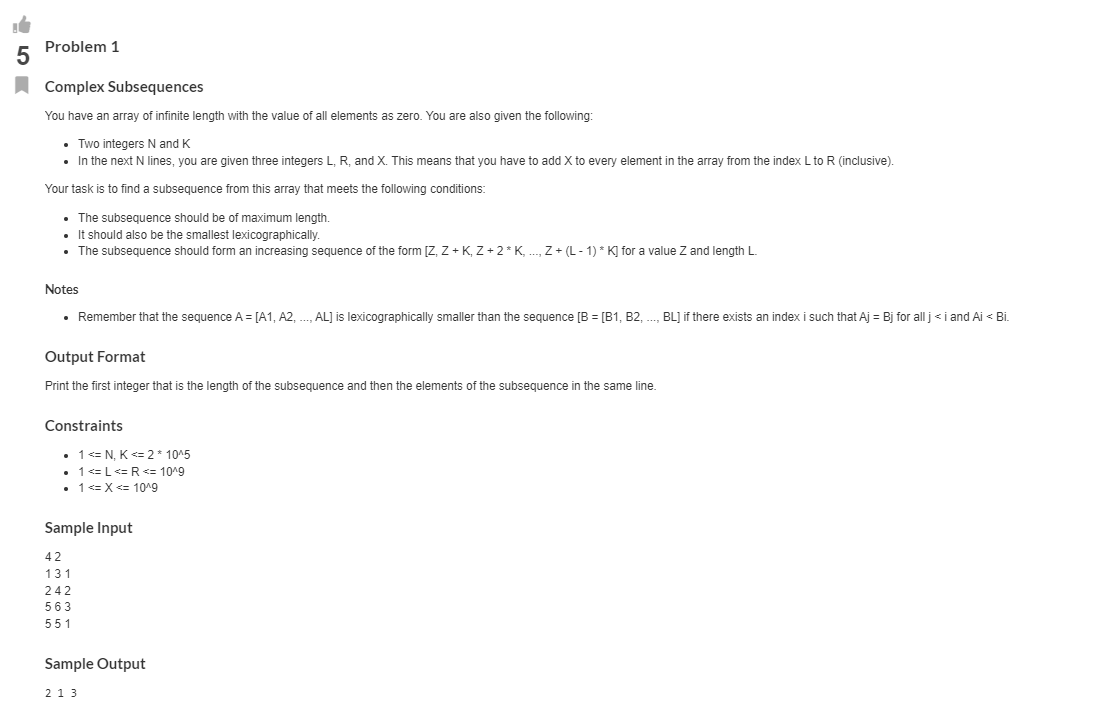

#include <bits/stdc++.h>
using namespace std;

vector<long long> solve(int N, int K, vector<vector<int>>& operations) {
    // Part 1: Handle range updates using a map to simulate infinite array
    map<long long, long long> diff;  // Difference array as a map
    
    // Apply all operations
    for (const auto& op : operations) {
        long long L = op[0], R = op[1], X = op[2];
        diff[L] += X;
        diff[R + 1] -= X;
    }
    
    // Convert difference array to actual values
    vector<pair<long long, long long>> values;  // {index, value}
    long long curr_val = 0;
    
    // Only store points where value changes
    for (const auto& [idx, delta] : diff) {
        curr_val += delta;
        values.push_back({idx, curr_val});
    }
    
    int M = values.size();
    vector<long long> result;
    
    // Part 2: Dynamic programming for longest subsequence
    vector<int> dp(M, 1);  // dp[i] stores the length of the longest subsequence ending at i
    vector<int> parent(M, -1);  // To reconstruct the subsequence
    
    unordered_map<long long, int> last_occurrence;  // Stores the last occurrence of each value

    for (int i = 0; i < M; i++) {
        long long expected_value = values[i].second - K;  // Look for a value that is smaller by K
        if (last_occurrence.find(expected_value) != last_occurrence.end()) {
            int j = last_occurrence[expected_value];
            if (dp[j] + 1 > dp[i]) {
                dp[i] = dp[j] + 1;
                parent[i] = j;  // Track the predecessor for subsequence reconstruction
            }
        }
        last_occurrence[values[i].second] = i;  // Update the last occurrence of the current value
    }

    // Find the index of the maximum length subsequence
    int max_len = 0, max_index = -1;
    for (int i = 0; i < M; i++) {
        if (dp[i] > max_len) {
            max_len = dp[i];
            max_index = i;
        }
    }

    // Reconstruct the subsequence
    vector<long long> subsequence;
    for (int i = max_index; i != -1; i = parent[i]) {
        subsequence.push_back(values[i].second);
    }
    reverse(subsequence.begin(), subsequence.end());

    // Insert length at the beginning
    subsequence.insert(subsequence.begin(), subsequence.size());
    return subsequence;
}

int main() {
    int N, K;
    cin >> N >> K;
    
    vector<vector<int>> operations(N, vector<int>(3));
    for (int i = 0; i < N; i++) {
        cin >> operations[i][0] >> operations[i][1] >> operations[i][2];
    }
    
    vector<long long> result = solve(N, K, operations);
    
    // Print result
    for (long long val : result) {
        cout << val << " ";
    }
    cout << endl;
    
    return 0;
}


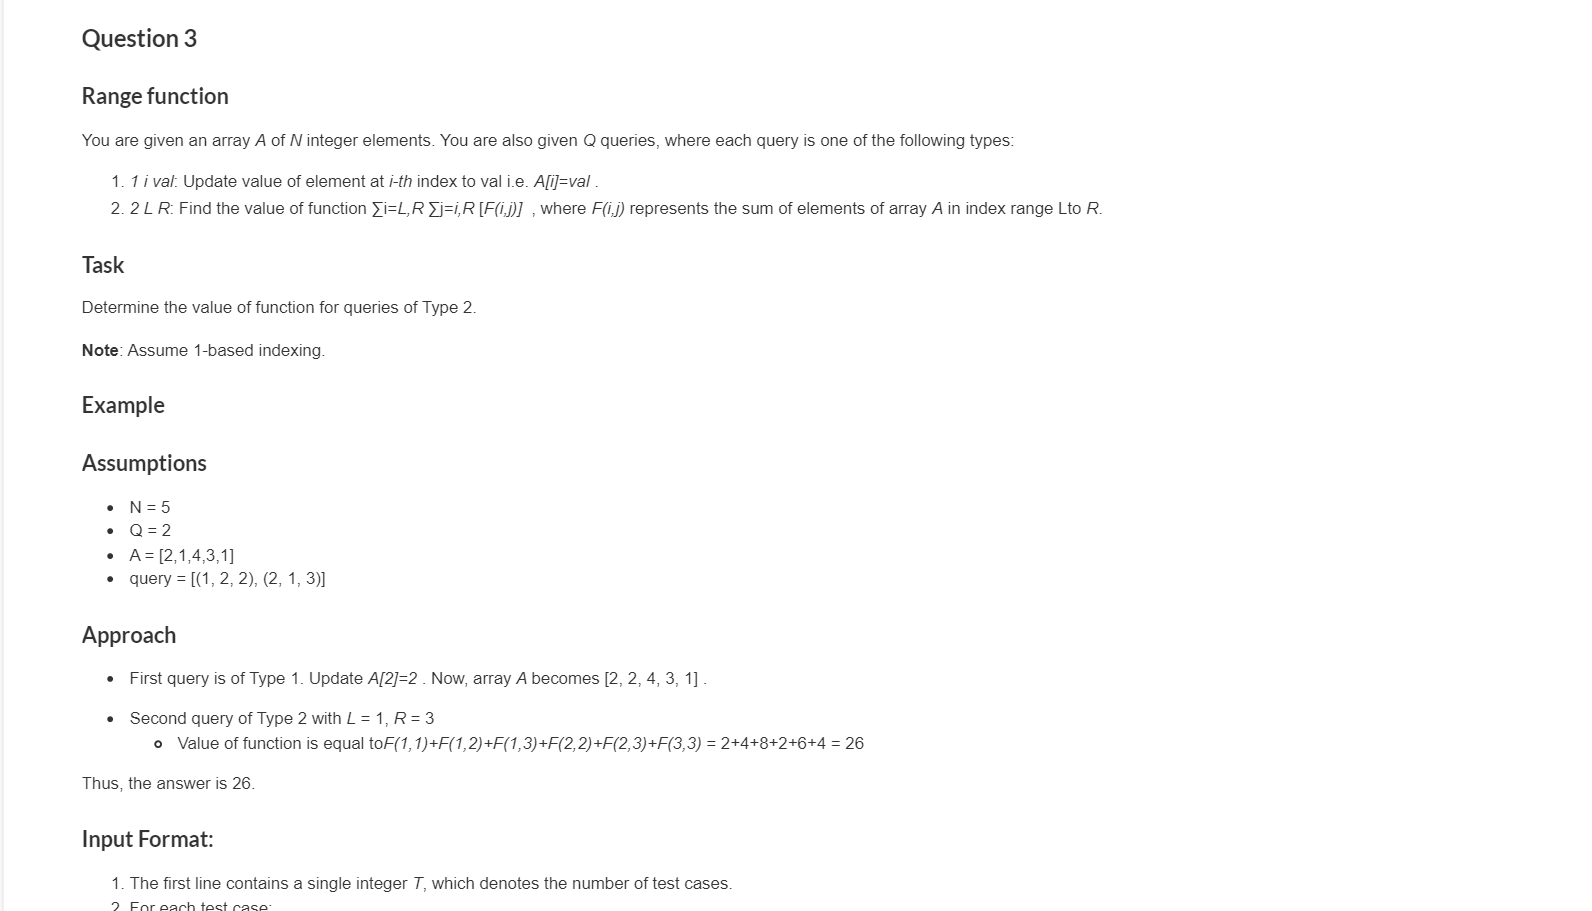

```cpp
#include <iostream>
#include <vector>

using namespace std;

vector<int> arr;  // Original array
vector<int> tree; // Segment tree

// Build the segment tree
void build(int node, int start, int end) {
    if (start == end) {
        tree[node] = arr[start]; // Leaf node will have a single element
        return;
    }

    int mid = (start + end) / 2;
    build(2 * node, start, mid);
    build(2 * node + 1, mid + 1, end);
    tree[node] = tree[2 * node] + tree[2 * node + 1]; // Internal node will have the sum of both of its children
}

// Update the segment tree
void update(int node, int start, int end, int idx, int val) {
    if (start == end) {
        arr[idx] = val; // Update the value in the original array
        tree[node] = val; // Update the leaf node
        return;
    }

    int mid = (start + end) / 2;

    if (idx <= mid) {
        update(2 * node, start, mid, idx, val);
    } else {
        update(2 * node + 1, mid + 1, end, idx, val);
    }

    tree[node] = tree[2 * node] + tree[2 * node + 1]; // Update the internal node
}

// Query the segment tree for the sum in the range [l, r]
int query(int node, int start, int end, int l, int r) {
    if (start > r || end < l) {
        return 0; // No overlap
    }
    if (start >= l && end <= r) {
        return tree[node]; // Total overlap
    }

    int mid = (start + end) / 2;
    int left_sum = query(2 * node, start, mid, l, r);
    int right_sum = query(2 * node + 1, mid + 1, end, l, r);

    return left_sum + right_sum; // Partial overlap
}

// Optimized function to calculate the sum of all subarrays within range [L, R]
long long sumOfSubarrays(int L, int R) {
    long long totalSum = 0;

    for (int k = L; k <= R; ++k) {
        // Number of subarrays including A[k]
        long long startCount = (k - L + 1); // Choices for the starting index
        long long endCount = (R - k + 1);   // Choices for the ending index

        // Contribution of A[k]
        totalSum += arr[k] * startCount * endCount;
    }

    return totalSum;
}

int main() {
    int N, Q;
    cout << "Enter the number of elements in the array: ";
    cin >> N;

    arr.resize(N + 1); // 1-based indexing
    tree.resize(4 * (N + 1)); // Sufficient size for segment tree

    cout << "Enter the elements of the array: ";
    for (int i = 1; i <= N; ++i) {
        cin >> arr[i];
    }

    build(1, 1, N); // Build the segment tree

    cout << "Enter the number of queries: ";
    cin >> Q;

    for (int q = 0; q < Q; ++q) {
        int type;
        cout << "Enter query type (1 for update, 2 for sum of subarrays): ";
        cin >> type;

        if (type == 1) {
            int i, val;
            cout << "Enter index and value to update: ";
            cin >> i >> val;
            update(1, 1, N, i, val); // Update the value at index i
        } else if (type == 2) {
            int L, R;
            cout << "Enter the range L and R: ";
            cin >> L >> R;
            long long result = sumOfSubarrays(L, R); // Calculate the sum of subarrays
            cout << "Sum of subarrays from " << L << " to " << R << " is: " << result << endl;
        }
    }

    return 0;
}


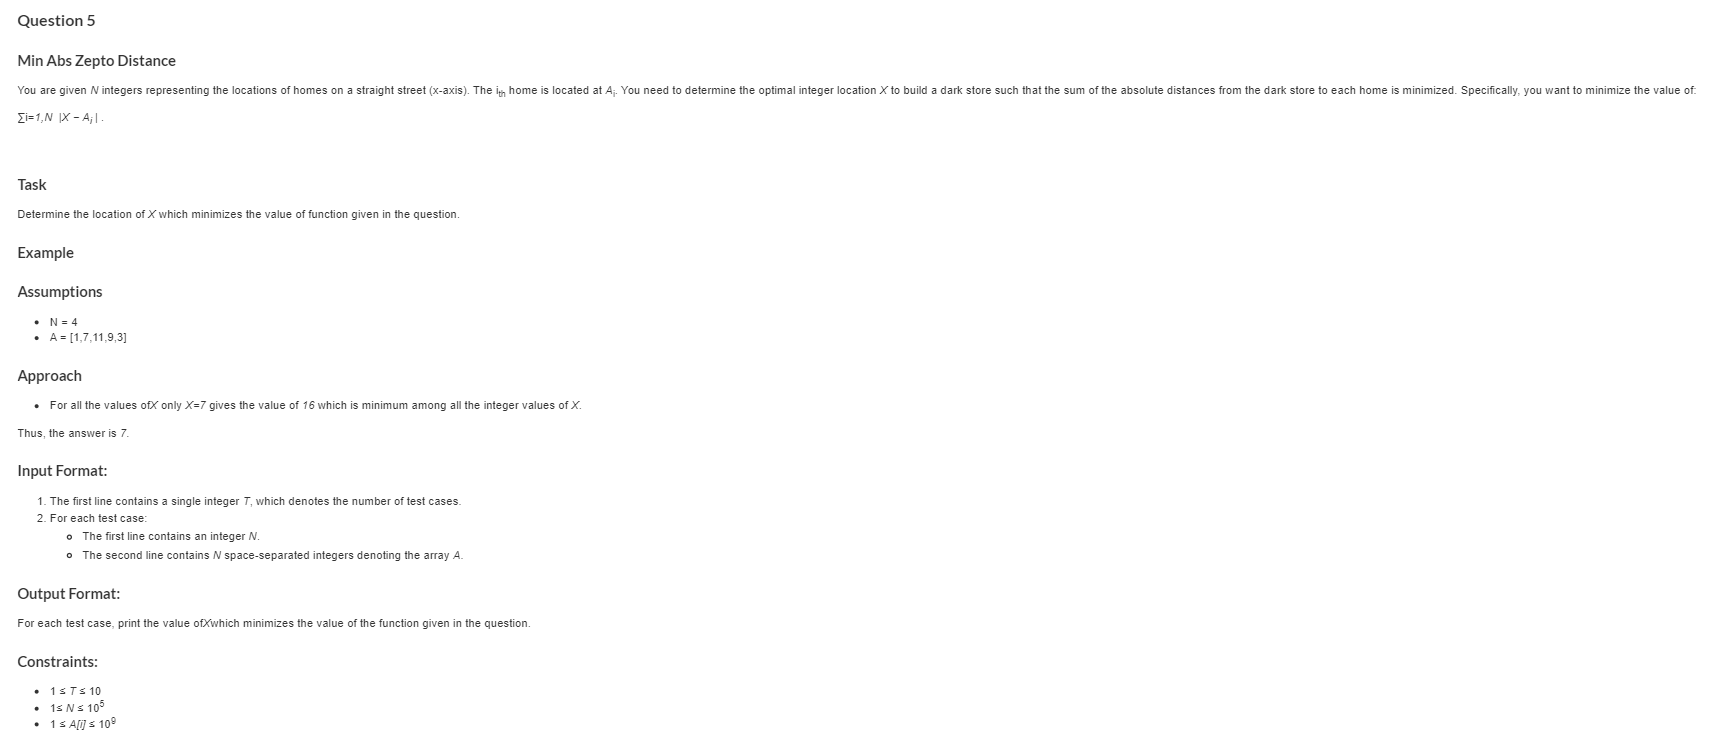

```cpp
#include <iostream>
#include <vector>
#include <algori`thm>

using namespace std;

int main() {
    int T;
    cin >> T; // Read number of test cases

    while (T--) {
        int N;
        cin >> N; // Read the number of homes
        vector<int> A(N); // Vector to store home locations

        for (int i = 0; i < N; ++i) {
            cin >> A[i]; // Read home locations
        }

        sort(A.begin(), A.end()); // Sort the home locations

        // Calculate the optimal location X
        int optimal_location;
        if (N % 2 == 1) {
            // If N is odd, choose the middle element
            optimal_location = A[N / 2];
        } else {
            // If N is even, choose any integer between the two middle elements
            optimal_location = (A[N / 2 - 1] + A[N / 2]) / 2; // You can also choose any integer in this range
            // Uncomment below to get any specific integer between the two medians
            // optimal_location = A[N / 2 - 1]; // Or use A[N / 2] for upper median
        }

        cout << optimal_location << endl; // Output the optimal location
    }

    return 0;
}


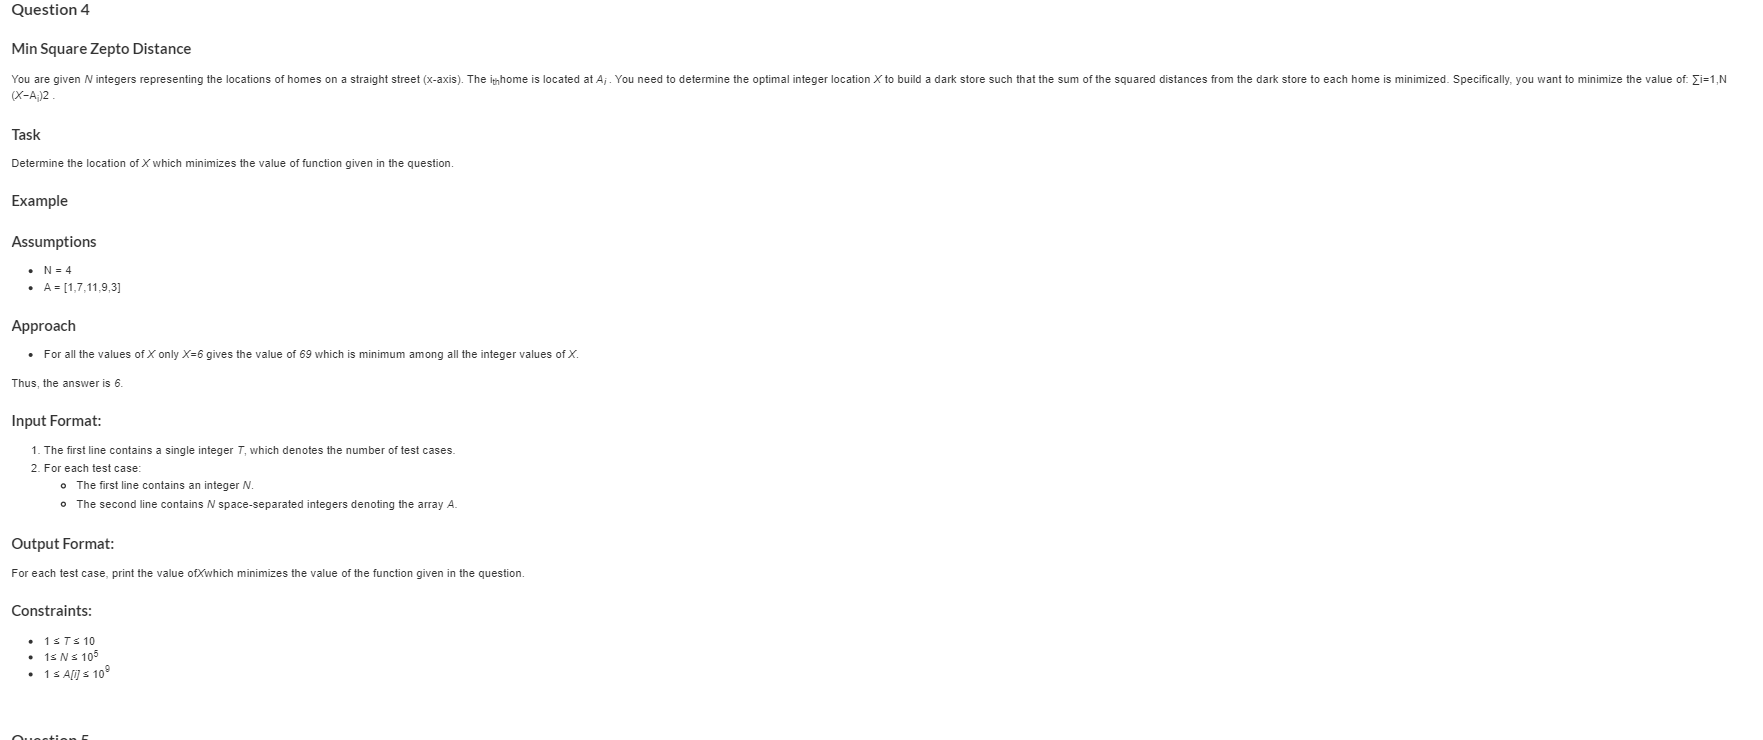

```cpp
#include <iostream>
#include <vector>

int main() {
    int n;
    std::cout << "Enter the number of elements: ";
    std::cin >> n;

    std::vector<int> arr(n);
    int sum = 0;

    std::cout << "Enter " << n << " values:\n";
    for (int i = 0; i < n; ++i) {
        std::cin >> arr[i];
        sum += arr[i]; // Calculate sum
    }

    // Calculate average using floor division
    int average = sum / n;

    std::cout << "The average (floor division) is: " << average << std::endl;

    return 0;
}


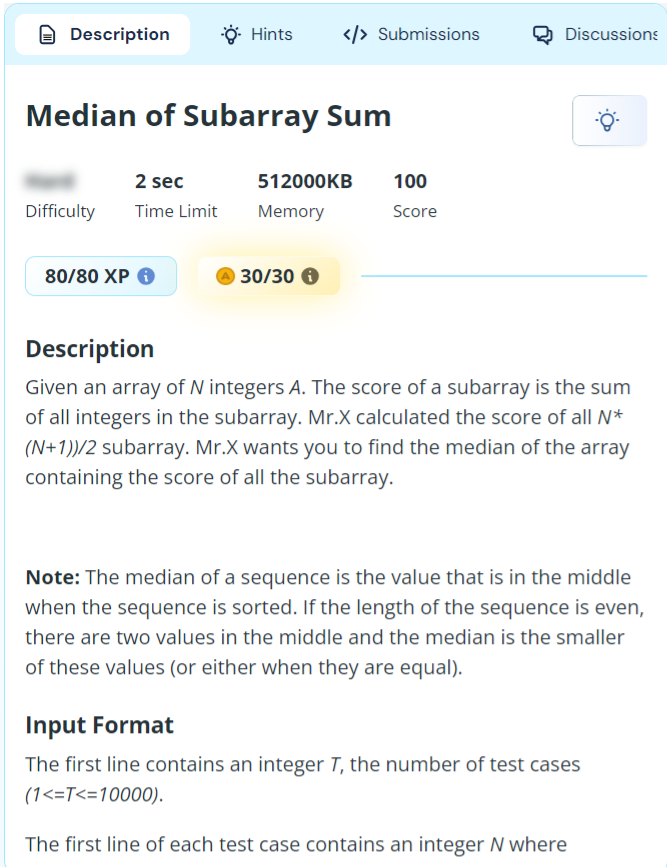

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


bool check(int mid,int k,vector<int>&arr){
	int cnt=0;
	int tail=0,head=-1;
	int n=arr.size();
	int sum=0;

	while(tail<n){
		while(head+1<n and (sum+arr[head+1]<=mid)){
			head++;
			sum+=arr[head];
		}
		cnt+=(head-tail+1);
		if(tail>head){
			tail++;
			head=tail-1;
		}else{
			sum-=arr[tail];
			tail++;
		}
	}
	return cnt>=k;
}



void solve(){

	int n;cin>>n;
	int l=0;
	int r=0;
	vector<int>arr(n);
	for(int i=0;i<n;i++){
		cin>>arr[i];
		r+=arr[i];
	}
	int tot=n*(n+1)/2;

	int k=(tot+1)/2;


	int ans=0;

	while(l<=r){
		int mid=l+(r-l)/2;
		if(check(mid,k,arr)){
			ans=mid;
			r=mid-1;
		}else{
			l=mid+1;
		}
	}
	cout<<ans<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    int _t;cin>>_t;while(_t--)
    solve();
}

```cpp
class Solution {
public:
    string longestPalindrome(string s) {
        string t="#";
        for(auto ch:s){
            t.push_back(ch);
            t.push_back('#');
        }
        int center=0;
        int rightBoundary=0;
        vector<int>p(t.size());
        for(int i=0;i<t.size();i++){
            int indexMirror=center-(i-center);
            if(i<rightBoundary)p[i]=min(rightBoundary-i,p[indexMirror]);
            int right=i+p[i]+1;
            int left=i-p[i]-1;
            while(right<t.size() and left>=0 and t[right]==t[left]){
                p[i]++;
                right++;
                left--;

            }
            if(i+p[i]>rightBoundary){
                center=i;
                rightBoundary=i+p[i];

            }


        }

        int longest=*max_element(p.begin(),p.end());
        int index=0;
        for(int i=0;i<p.size();i++){
            if(p[i]==longest){
                index=i;
                break;
            }
        }
        cout<<endl;
        string ans="";
        for(int i=index-p[index];i<=index+p[index];i++){
            if(t[i]=='#')continue;
            ans.push_back(t[i]);
        }
        cout<<endl;

        return ans;



    }
};


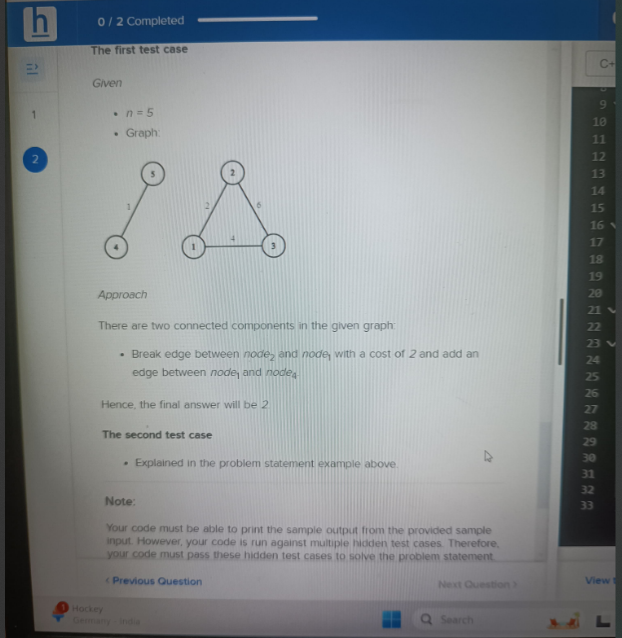

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long

// #include <ext/pb_ds/assoc_container.hpp>
// #include <ext/pb_ds/tree_policy.hpp>
// using namespace __gnu_pbds;

// typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

// /*

// os.find_by_order(os.order_of_key(num));      
// os.order_of_key(num) position of number 
// */






vector<int>parent;
vector<int>sizes;




int find(int node){
	if(node==parent[node]){
		return node;
	}

	return parent[node]=find(parent[node]);
}


bool unite(int x,int y){
	x=find(x);
	y=find(y);
	if(x==y)return false;
	if(sizes[x]<sizes[y]){
		sizes[y]+=sizes[x];
		parent[x]=y;
	}else{
		sizes[x]+=sizes[y];
		parent[y]=x;
	}
	return true;

}


bool cmp(vector<int>&a,vector<int>&b){
	return a[0]>b[0];
}



void solve(){


	int n,m;
	cin>>n>>m;
	vector<vector<int>>edges;
	for(int i=0;i<m;i++){
		int u,v,c;
		cin>>u>>v>>c;
		edges.push_back({c,u,v,i});
	}

	parent.assign(n+1,0);
	sizes.assign(n+1,1);
	for(int i=0;i<=n;i++){
		parent[i]=i;
	}




	sort(edges.begin(),edges.end(),cmp);
	vector<bool>usedEdges(m);
	int components=0;
	for(auto it:edges){
		int cost=it[0];
		int x=it[1];
		int y=it[2];
		int ind=it[3];
		if(unite(x,y)){
			usedEdges[ind]=true;
		}
	}

	for(int i=1;i<=n;i++){
		if(i==parent[i]){
			components++;
		}
	}

	
	vector<vector<int>>unused;

	for(auto it:edges){
		int cost=it[0];
		int x=it[1];
		int y=it[2];
		int ind=it[3];
		if(!usedEdges[ind]){
			unused.push_back(it);
		}
	}

	sort(unused.begin(),unused.end());


	int needed=components-1;

	if(unused.size()<needed){
		cout<<-1<<endl;

	}else{
		int ans=0;
		int cnt=0;
		for(auto &it:unused){
			ans+=it[0];
			cnt++;
			if(cnt==needed){
				break;
			}

		}
		cout<<ans<<endl;

	}

	




    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

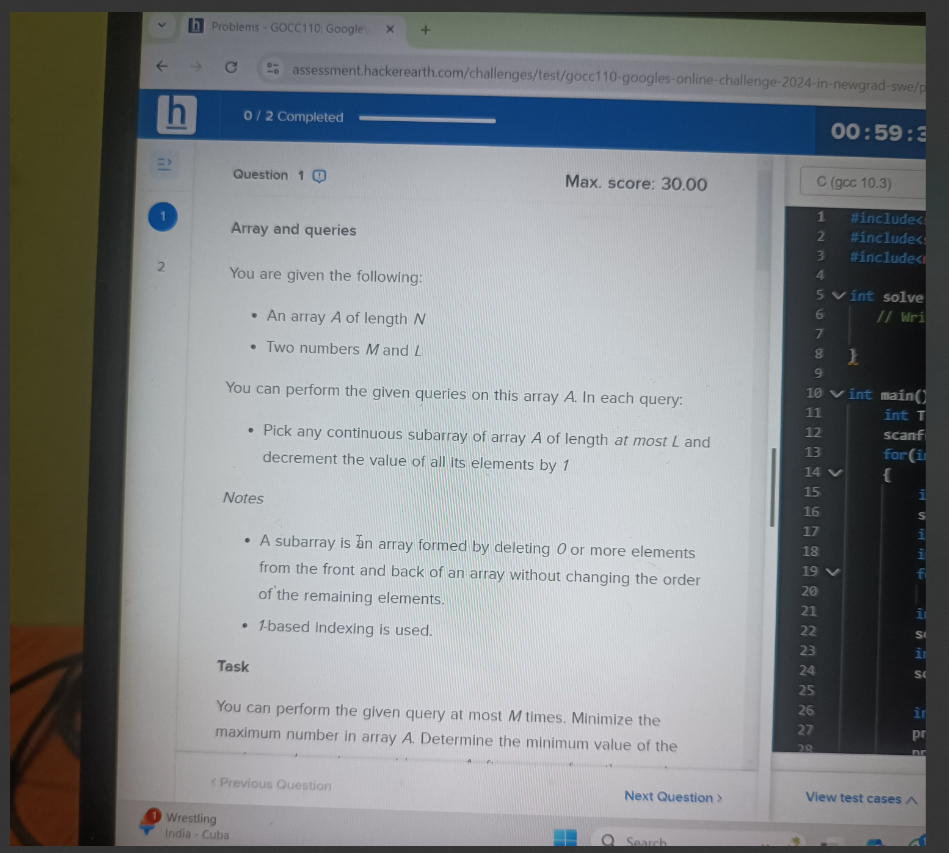
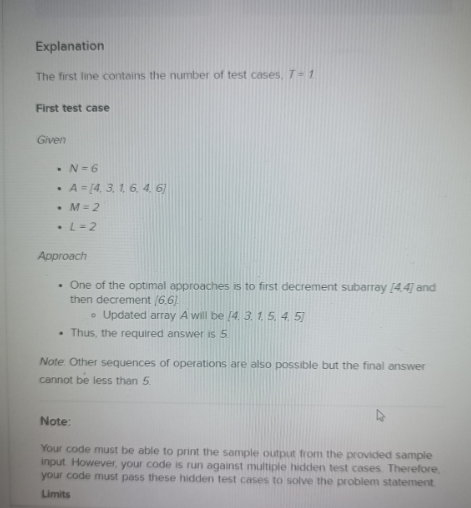

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long

// #include <ext/pb_ds/assoc_container.hpp>
// #include <ext/pb_ds/tree_policy.hpp>
// using namespace __gnu_pbds;

// typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/



bool check(vector<int>arr,int n,int m,int L,int target){
    int op=0;
    vector<int> add(n+1);
    int curr=0;
    for(int i=0;i<n;i++){
        curr+=add[i];


        int needed=arr[i]-curr-target;

        if(needed>0){
            op+=needed;
            if(op>m)return false;

            add[i]+=needed;

            if(i+L<n){
                add[i+L]-=needed;

            }

            curr+=needed;

        }
    }
    return op<=m;
}

void solve(){


    int n;
    cin>>n;
    vector<int>arr(n);
    for(int i=0;i<n;i++){
        cin>>arr[i];
    }


    int m;
    cin>>m;
    int L;
    cin>>L;

    int l=0;
    int r=*max_element(arr.begin(),arr.end());

    int ans=r;



    while(l<=r){
        int mid=l+(r-l)/2;
        if(check(arr,n,m,L,mid)){
            ans=mid;
            r=mid-1;
        }else{
            l=mid+1;
        }
    }   

    cout<<ans<<endl; 

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);    
    // int _t;cin>>_t;while(_t--)
    solve();
}

```cpp
Manachers Algorithm 
class Solution {
public:
    string longestPalindrome(string s) {
        string t="#";
        for(auto ch:s){
            t.push_back(ch);
            t.push_back('#');
        }
        int center=0;
        int rightBoundary=0;
        vector<int>p(t.size());
        for(int i=0;i<t.size();i++){
            int indexMirror=center-(i-center);
            if(i<rightBoundary)p[i]=min(rightBoundary-i,p[indexMirror]);
            int right=i+p[i]+1;
            int left=i-p[i]-1;
            while(right<t.size() and left>=0 and t[right]==t[left]){
                p[i]++;
                right++;
                left--;

            }
            if(i+p[i]>rightBoundary){
                center=i;
                rightBoundary=i+p[i];

            }


        }

        int longest=*max_element(p.begin(),p.end());
        int index=0;
        for(int i=0;i<p.size();i++){
            if(p[i]==longest){
                index=i;
                break;
            }
        }
        cout<<endl;
        string ans="";
        for(int i=index-p[index];i<=index+p[index];i++){
            if(t[i]=='#')continue;
            ans.push_back(t[i]);
        }
        cout<<endl;

        return ans;



    }
};